## **SC1015 Mini Project**

1.   Hung Kuo-Chen (Matric no.)
2.   Jodi Tay Seow Xuan (U2121318G)
3.   Yang Xiaoyue (U2120602G)

## **Contents**

1. Cleaning and Exploratory Analysis
2. Random Forest Classifier
3. Logistic Regression
4. Neural Network
5. Findings and Summary

## **Objective**

Based on the IBM HR Attrition dataset from Kaggle
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
we aim to find out:

*   The top reasons an employee would leave the company
*   How IBM can better improve itself to retain employees



In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [ ]:
# Import dataset
ibmdata = pd.read_csv('IBMAttrition.csv')
ibmdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **STEP 1: Cleaning**

In this section, we aim to check for missing/null values and remove columns that are insignificant in predicting attrition

In [ ]:
#remove insignificant columns 'EmployeeCount', 'Over18' and 'StandardHours' ('StandardHours' is 80 for all employees)
agedf = pd.DataFrame(ibmdata['Age'])
ibmdata = ibmdata.drop(columns = ['EmployeeCount','Over18','StandardHours', 'Age'])

In [ ]:
ibmdata['Age'] = agedf
ibmdata.Attrition.replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)

In [ ]:
#Check for duplicates in EmployeeNumber
ibmdata['EmployeeNumber'].is_unique

True

In [ ]:
ibmNumeric = ibmdata.select_dtypes('int64')
ibmNumeric.describe().round(2)

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,0.16,802.49,9.19,2.91,1024.87,2.72,65.89,2.73,2.06,2.73,...,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12,36.92
std,0.37,403.51,8.11,1.02,602.02,1.09,20.33,0.71,1.11,1.10,...,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57,9.14
min,0.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,18.00
25%,0.00,465.00,2.00,2.00,491.25,2.00,48.00,2.00,1.00,2.00,...,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00,30.00
50%,0.00,802.00,7.00,3.00,1020.50,3.00,66.00,3.00,2.00,3.00,...,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00,36.00
75%,0.00,1157.00,14.00,4.00,1555.75,4.00,83.75,3.00,3.00,4.00,...,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00,43.00
max,1.00,1499.00,29.00,5.00,2068.00,4.00,100.00,4.00,5.00,4.00,...,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00,60.00


In [ ]:
#Check for NULL values in entire dataframe
ibmdata.isnull().values.any()

False

### **STEP 2: Basic Visualization**

In this section, we will perform data visualization on the numeric and categorical variables within the dataset. This helps us understand their breakdowns and sets us up for machine learning.

In [ ]:
#Attrition Rates
ibmdata["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

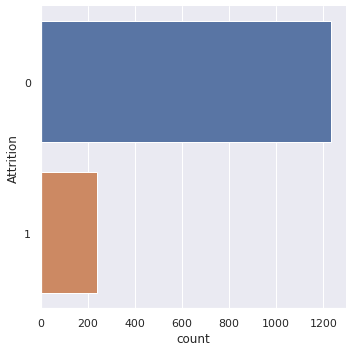

In [ ]:
#Attrition
sb.catplot(y = "Attrition", data = ibmdata, kind = "count")

Numeric Variables

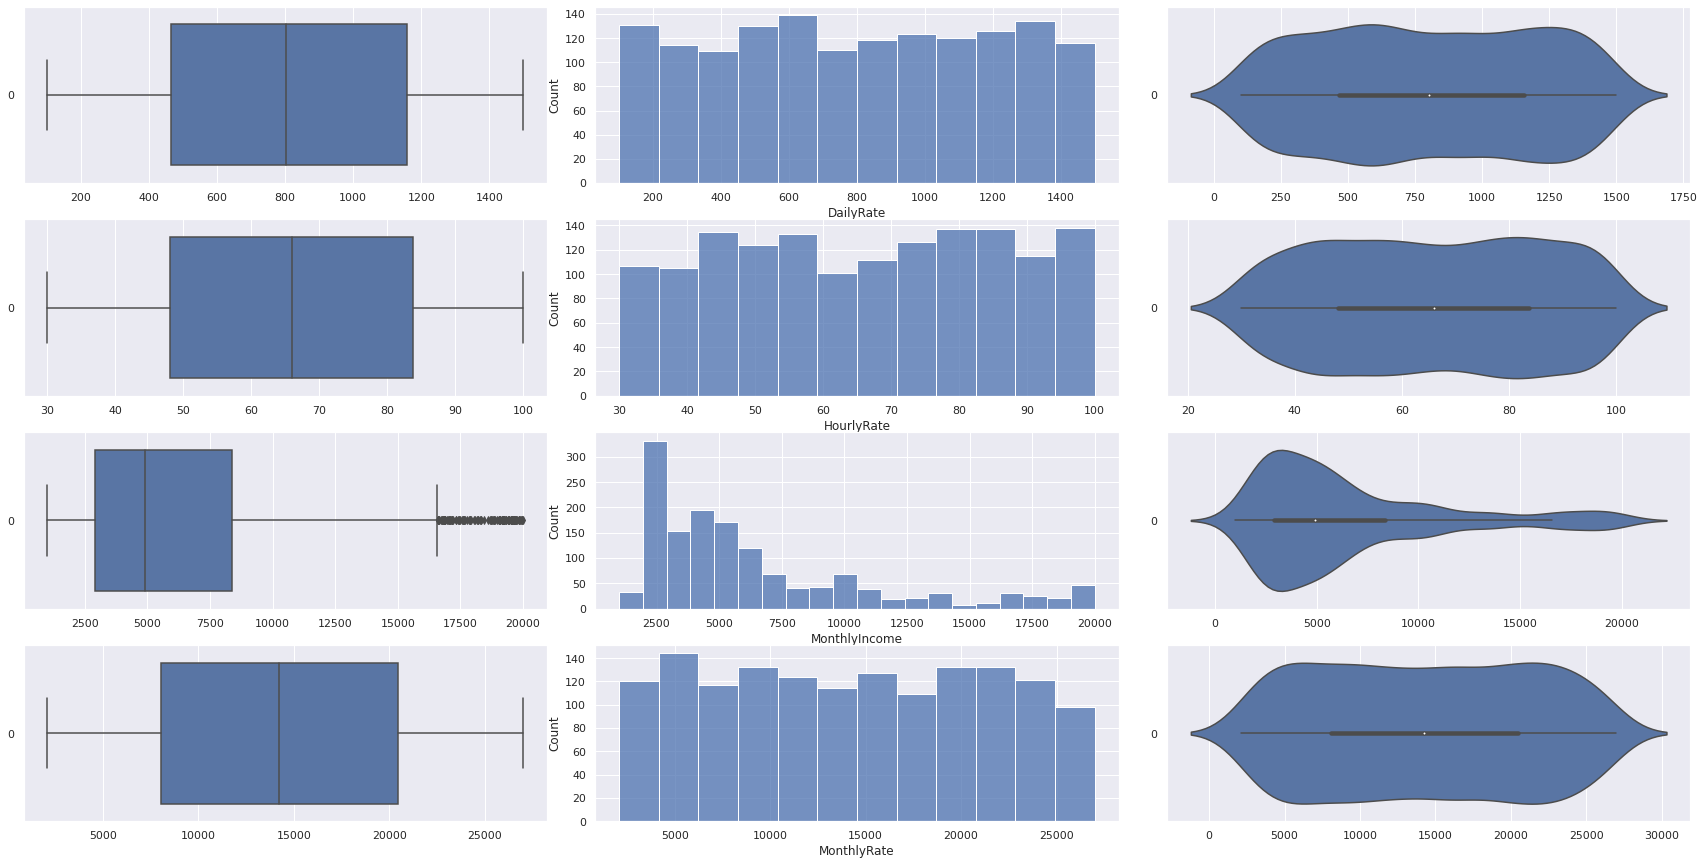

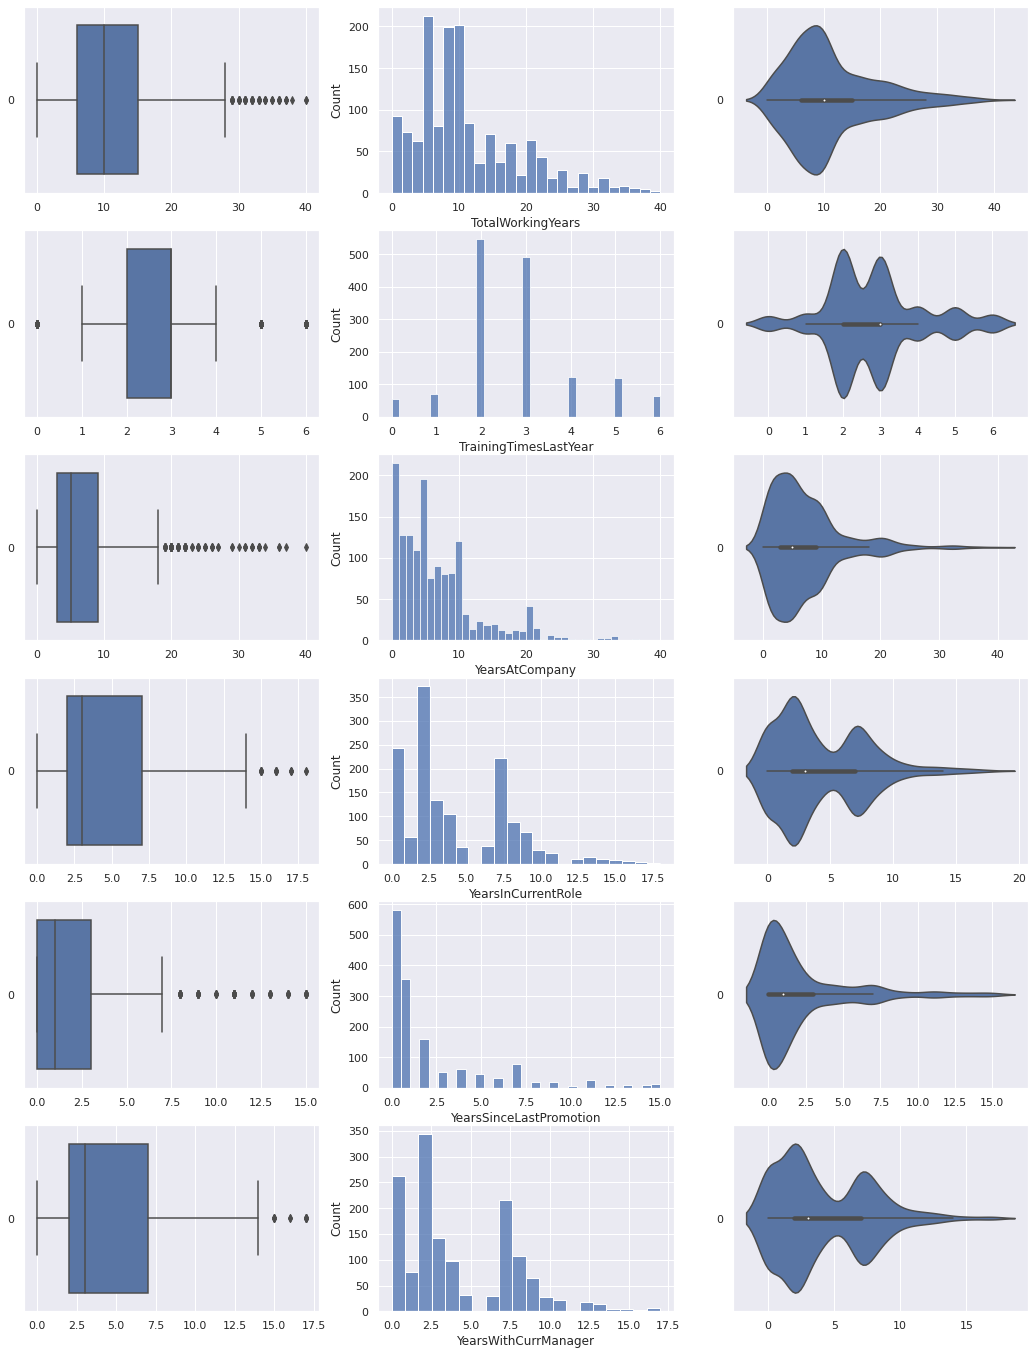

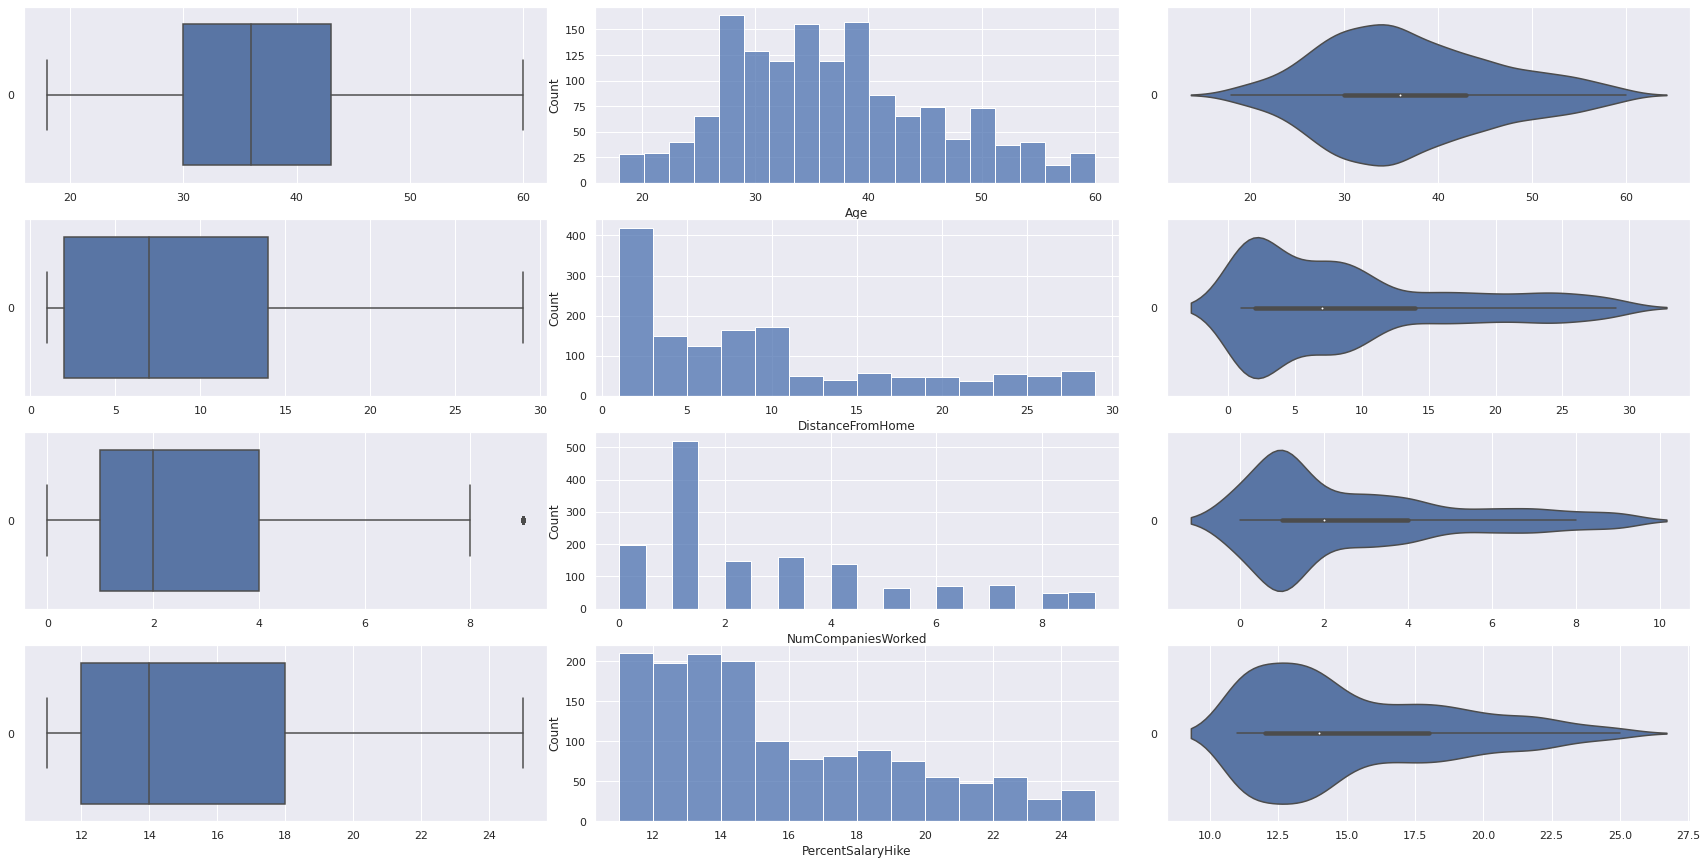

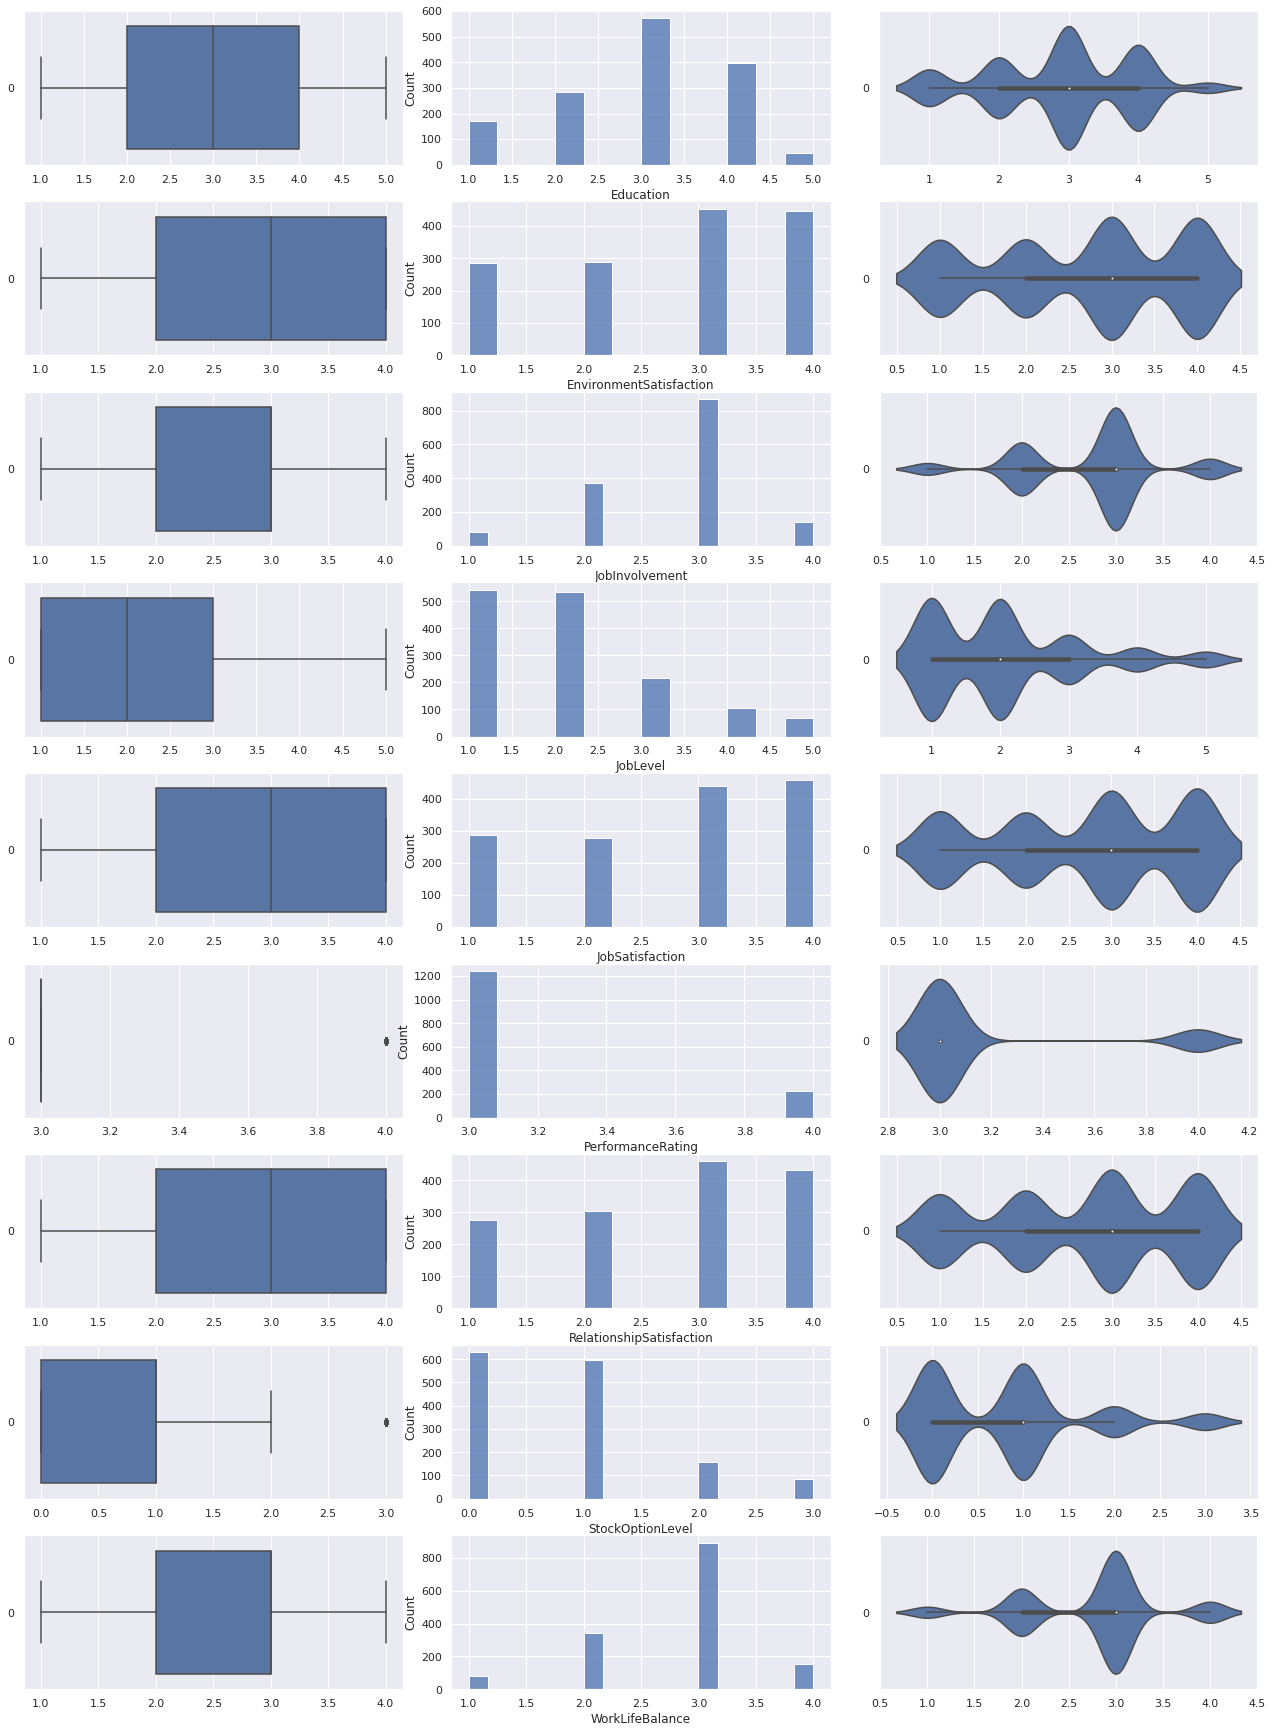

In [ ]:
# Large numeric data

f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Format the layout so that no overlapping between titles and graphs
plt.tight_layout()

# Daily Rate
sb.boxplot(data = ibmNumeric["DailyRate"], orient = "h", ax = axes[0,0])
sb.histplot(data = ibmNumeric["DailyRate"], ax = axes[0,1])
sb.violinplot(data = ibmNumeric["DailyRate"], orient = "h", ax = axes[0,2])

# Hourly Rate
sb.boxplot(data = ibmNumeric["HourlyRate"], orient = "h", ax = axes[1,0])
sb.histplot(data = ibmNumeric["HourlyRate"], ax = axes[1,1])
sb.violinplot(data = ibmNumeric["HourlyRate"], orient = "h", ax = axes[1,2])

# Monthly Income
sb.boxplot(data = ibmNumeric["MonthlyIncome"], orient = "h", ax = axes[2,0])
sb.histplot(data = ibmNumeric["MonthlyIncome"], ax = axes[2,1])
sb.violinplot(data = ibmNumeric["MonthlyIncome"], orient = "h", ax = axes[2,2])

# Monthly Rate
sb.boxplot(data = ibmNumeric["MonthlyRate"], orient = "h", ax = axes[3,0])
sb.histplot(data = ibmNumeric["MonthlyRate"], ax = axes[3,1])
sb.violinplot(data = ibmNumeric["MonthlyRate"], orient = "h", ax = axes[3,2])

# numeric data regarding time
ibmNumeric_time = ibmNumeric[['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in ibmNumeric_time:
    sb.boxplot(data = ibmNumeric_time[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = ibmNumeric_time[var], ax = axes[count,1])
    sb.violinplot(data = ibmNumeric_time[var], orient = "h", ax = axes[count,2])
    count += 1

f, axes = plt.subplots(4, 3, figsize=(24, 12))
plt.tight_layout()

#Age
sb.boxplot(data = ibmNumeric["Age"], orient = "h", ax = axes[0,0])
sb.histplot(data = ibmNumeric["Age"], ax = axes[0,1])
sb.violinplot(data = ibmNumeric["Age"], orient = "h", ax = axes[0,2])

#DistanceFromHome
sb.boxplot(data = ibmNumeric["DistanceFromHome"], orient = "h", ax = axes[1,0])
sb.histplot(data = ibmNumeric["DistanceFromHome"], ax = axes[1,1])
sb.violinplot(data = ibmNumeric["DistanceFromHome"],orient = "h", ax = axes[1,2])

#NumCompaniesWorked
sb.boxplot(data = ibmNumeric["NumCompaniesWorked"], orient = "h", ax = axes[2,0])
sb.histplot(data = ibmNumeric["NumCompaniesWorked"], ax = axes[2,1])
sb.violinplot(data = ibmNumeric["NumCompaniesWorked"],orient = "h", ax = axes[2,2])

#PercentSalaryHike
sb.boxplot(data = ibmNumeric["PercentSalaryHike"], orient = "h", ax = axes[3,0])
sb.histplot(data = ibmNumeric["PercentSalaryHike"], ax = axes[3,1])
sb.violinplot(data = ibmNumeric["PercentSalaryHike"], orient = "h", ax = axes[3,2])

# Ordinal Variables

# Extract all the numeric level variables
ibmLevel = pd.DataFrame(ibmNumeric[["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction","PerformanceRating", "RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]])

# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(18, 24))

# Format the layout so that no overlapping between titles and graphs
plt.tight_layout()

count = 0
for var in ibmLevel:
    sb.boxplot(data = ibmLevel[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = ibmLevel[var], ax = axes[count,1])
    sb.violinplot(data = ibmLevel[var], orient = "h", ax = axes[count,2])
    count += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

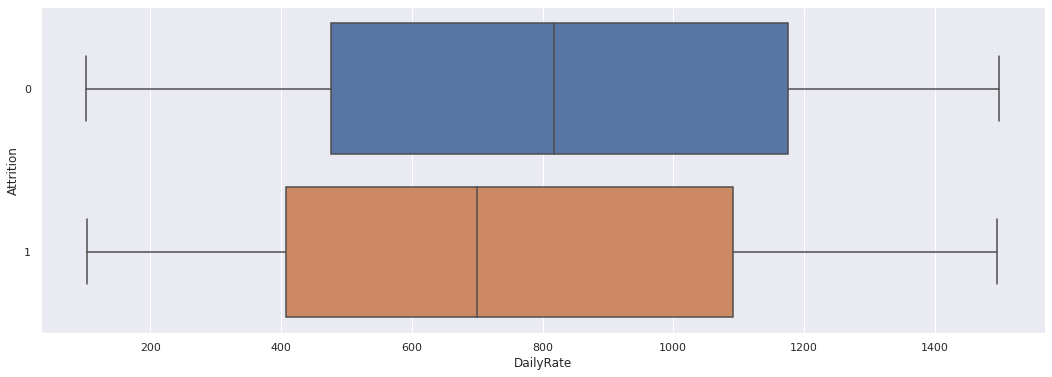

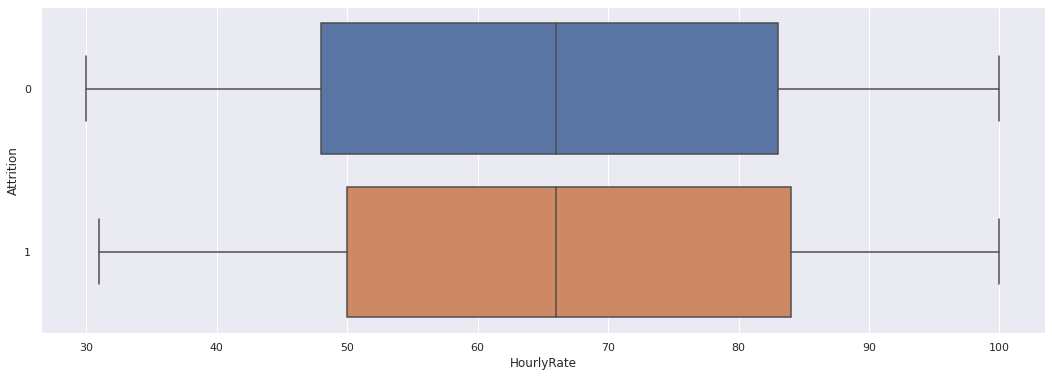

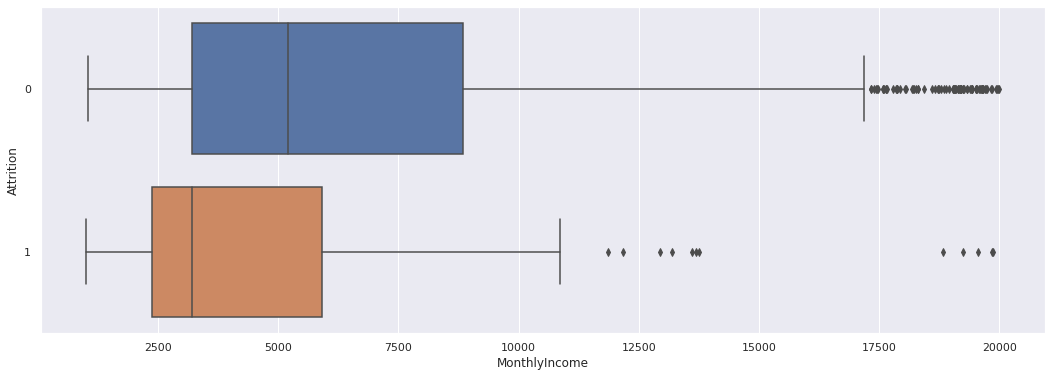

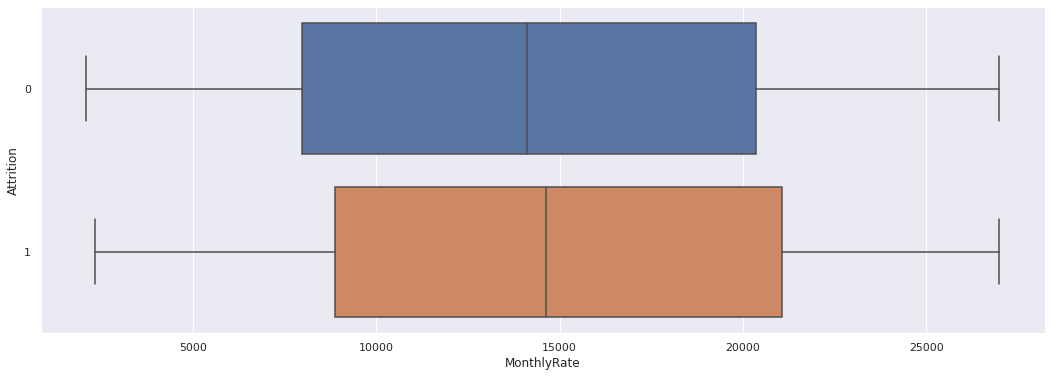

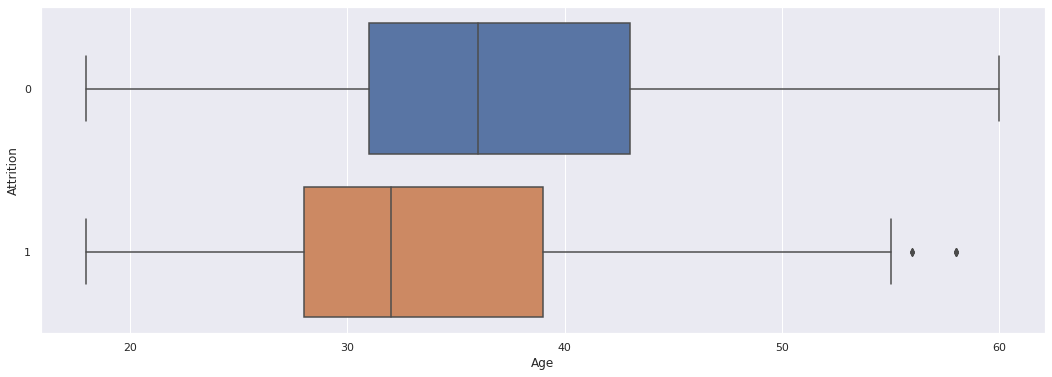

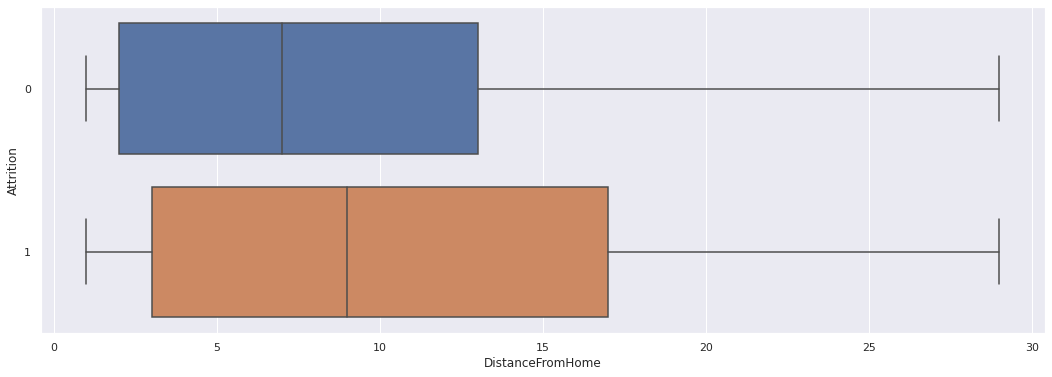

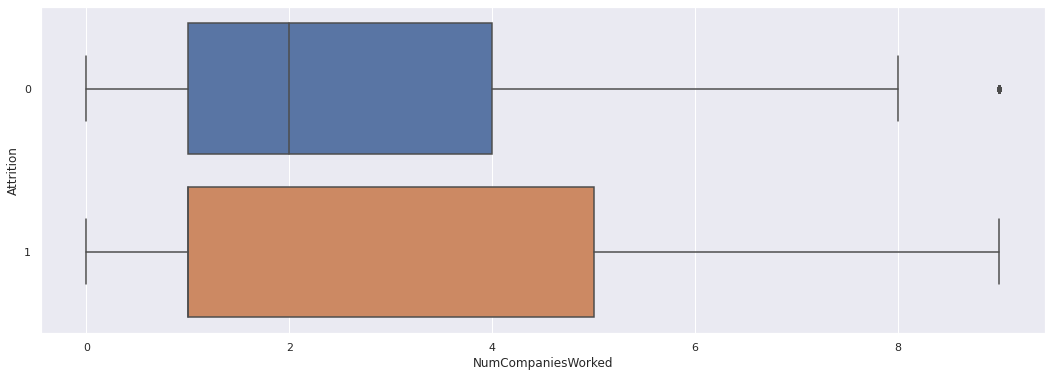

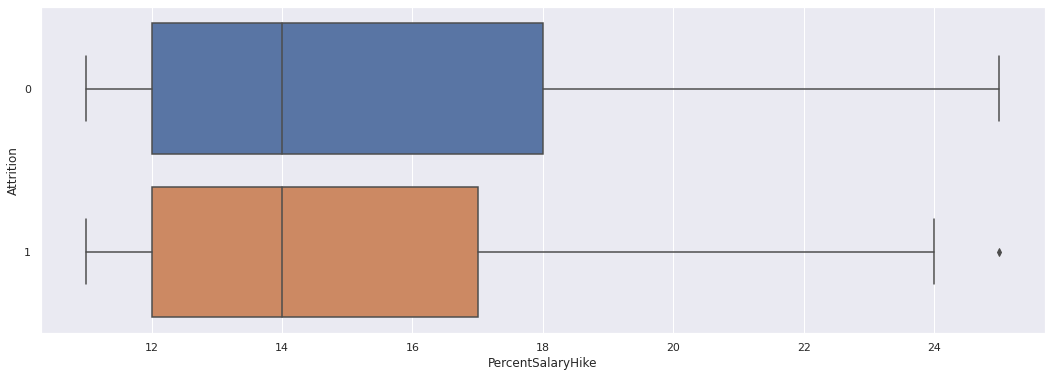

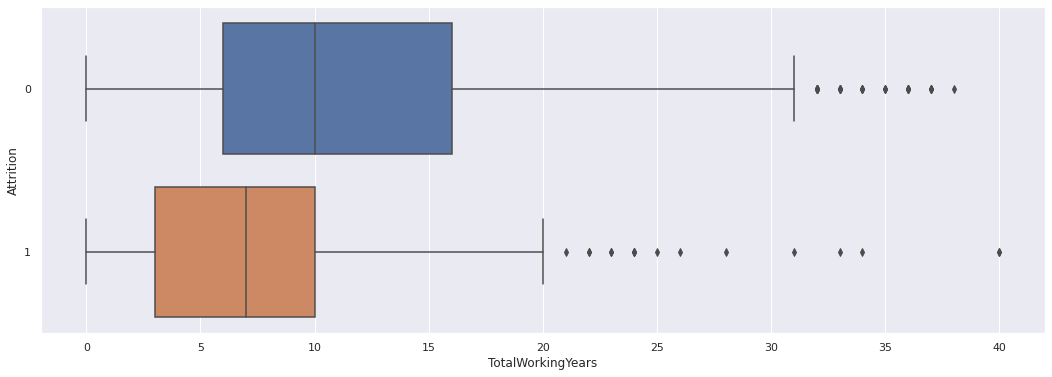

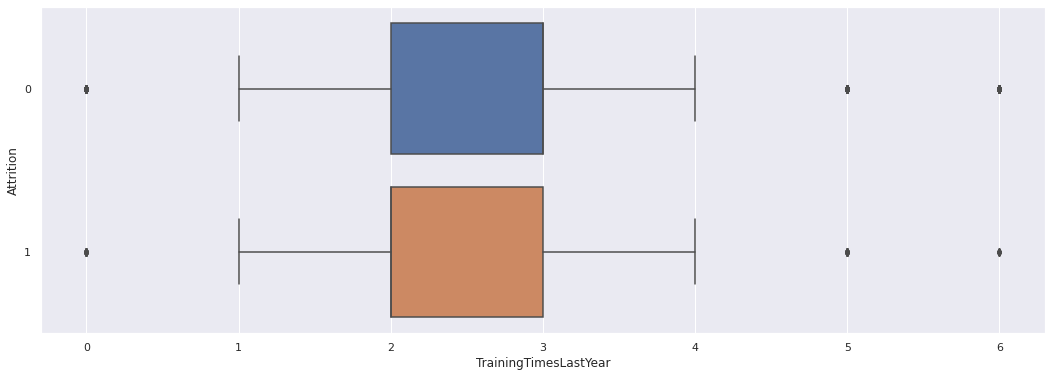

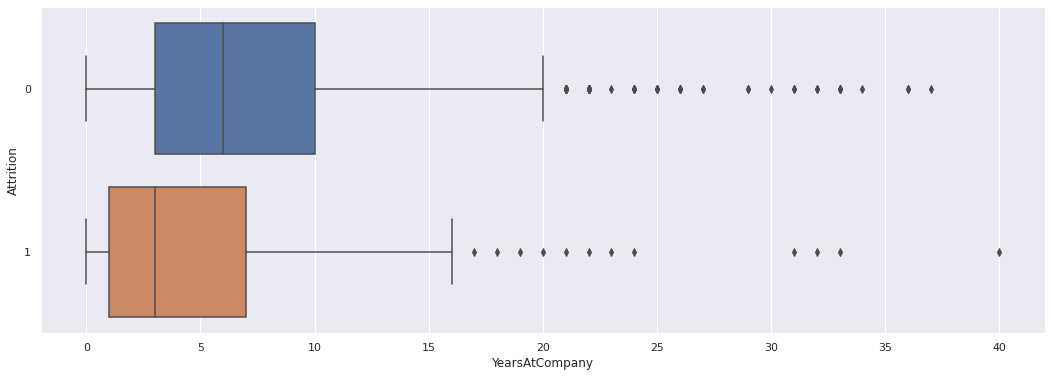

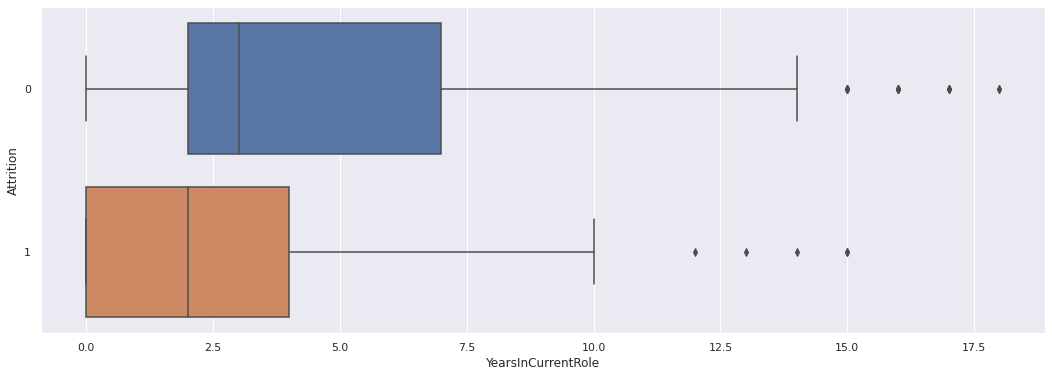

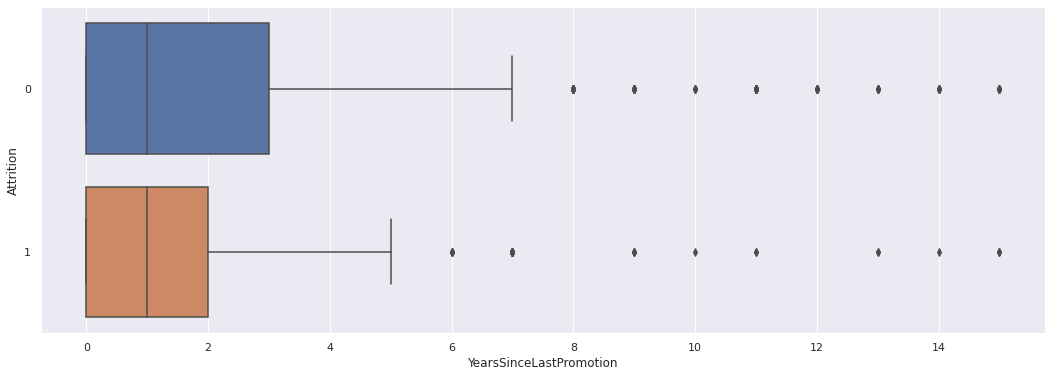

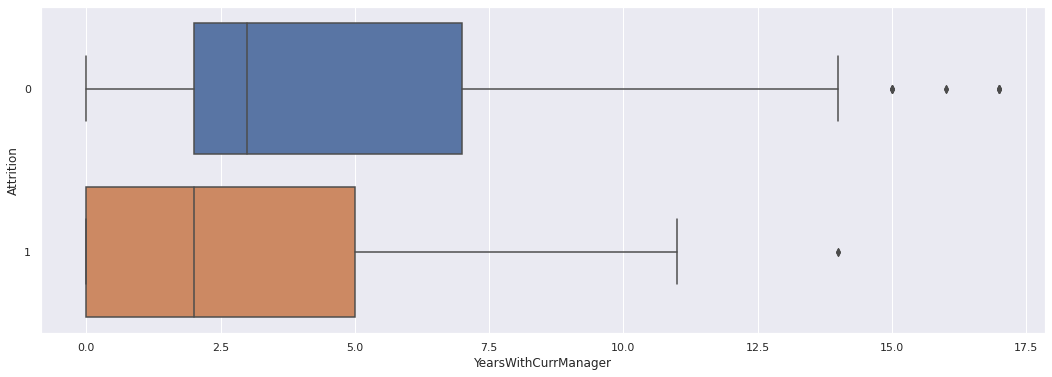

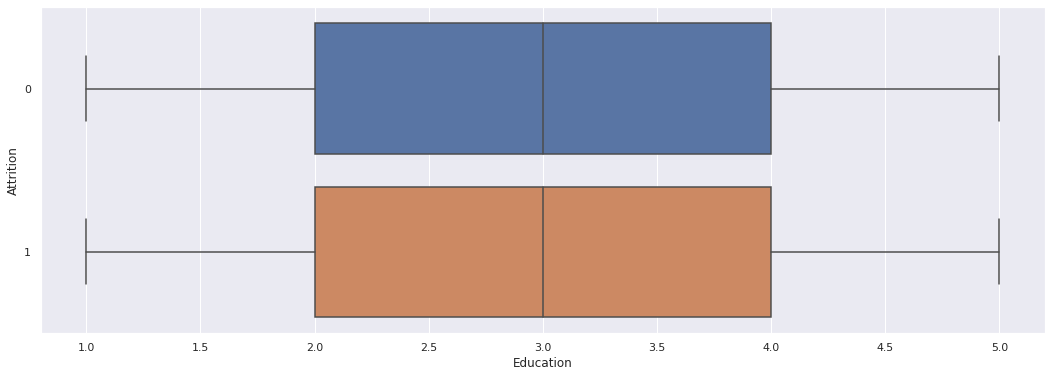

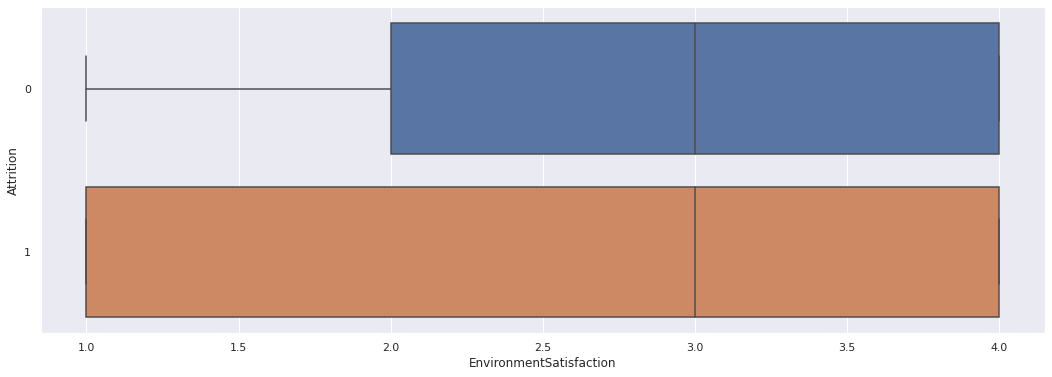

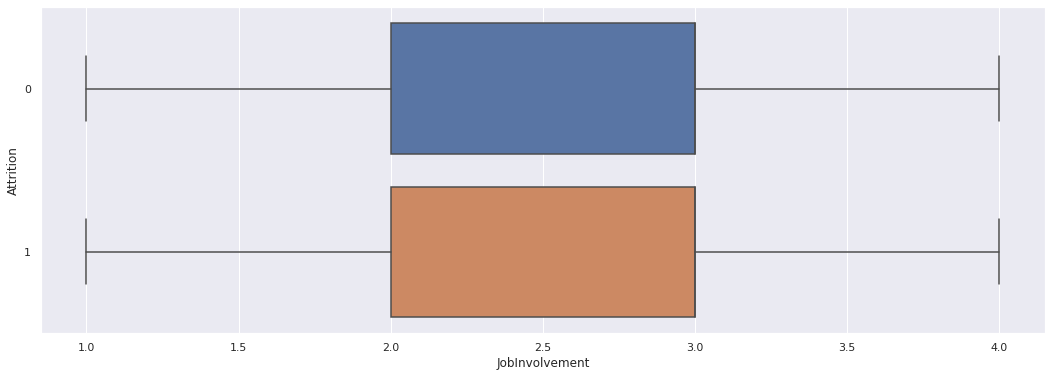

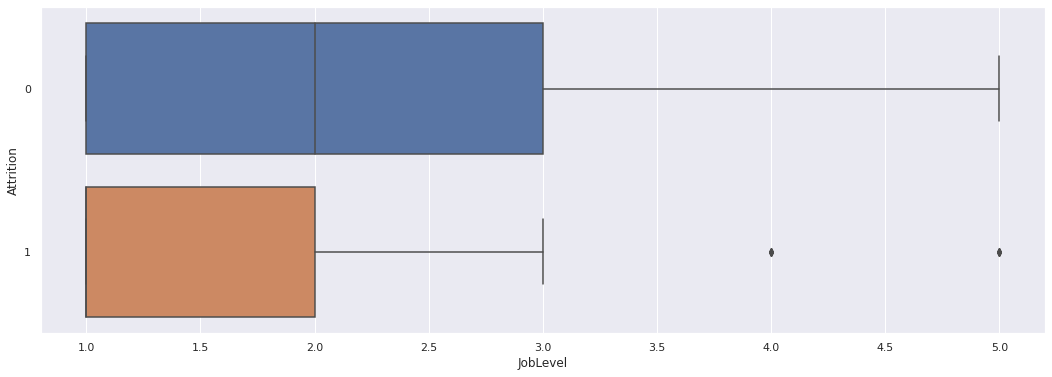

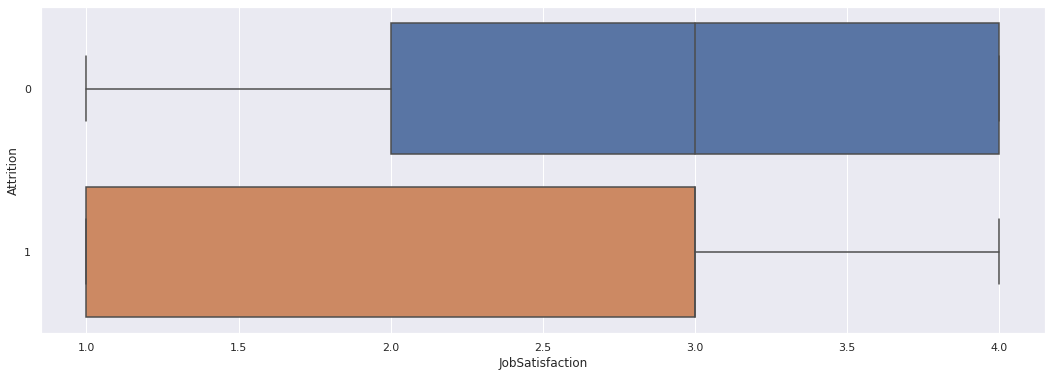

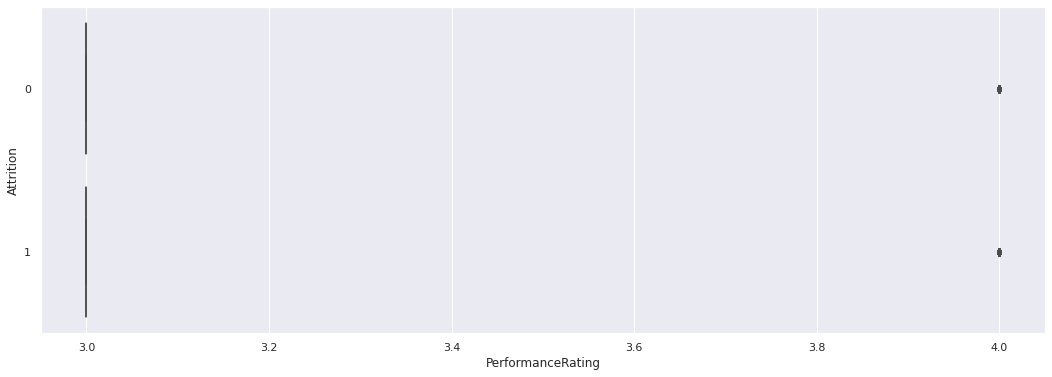

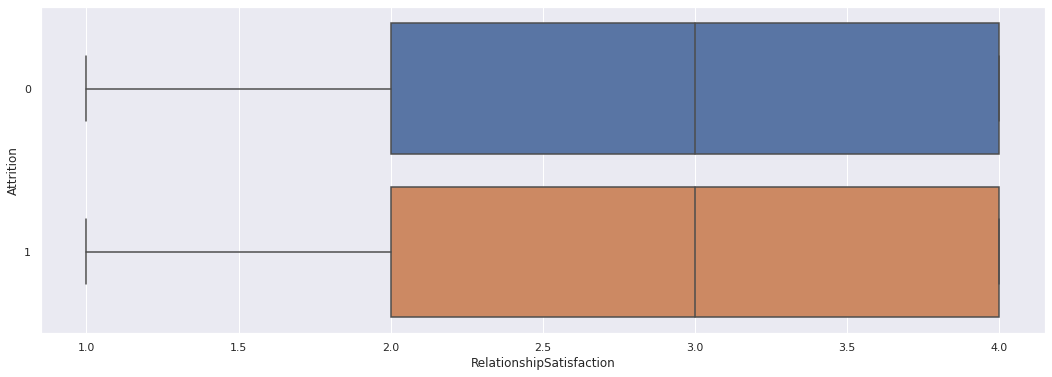

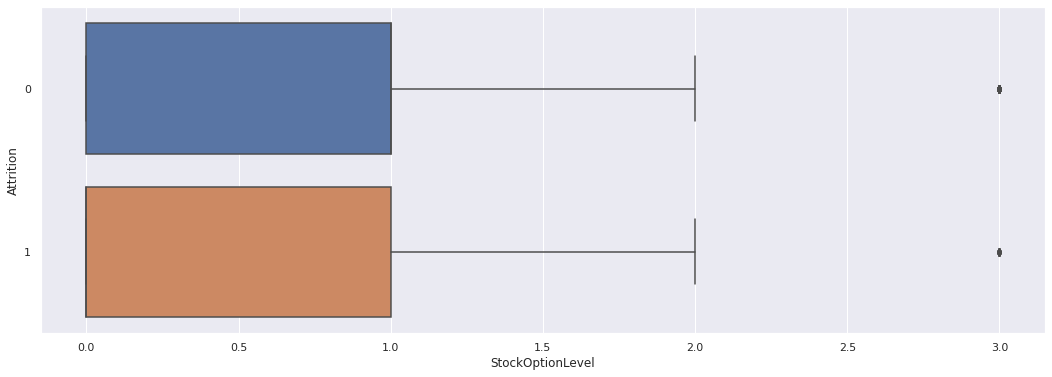

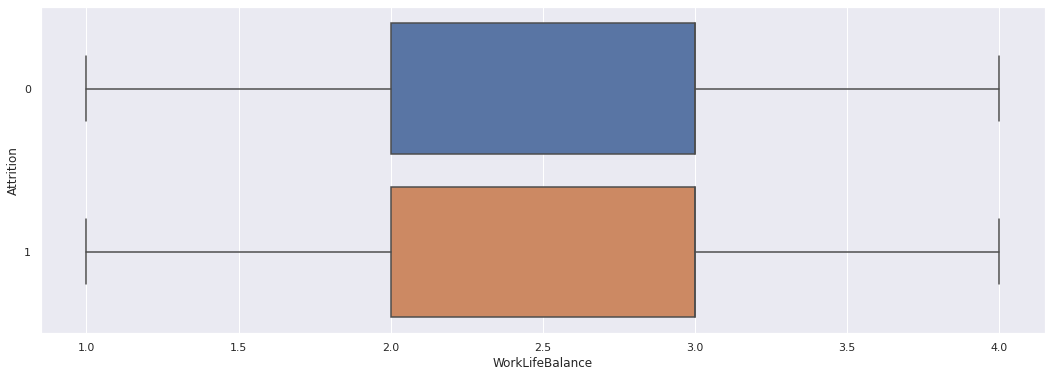

In [ ]:
# Joint boxplot of numeric variables against Attrition
ibmNumeric_large = ibmNumeric[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']]

for var in ibmNumeric_large:
  tempdf = ibmdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

ibmint = ibmNumeric[['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike']]

for var in ibmint:
  tempdf = ibmdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

for var in ibmNumeric_time:
  tempdf = ibmdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

for var in ibmLevel:
  tempdf = ibmdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

Categorical Variables

In [ ]:
#Levels within Marital Status
ibmdata["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Attrition  MaritalStatus
0          Divorced         294
           Married          589
           Single           350
1          Divorced          33
           Married           84
           Single           120
dtype: int64


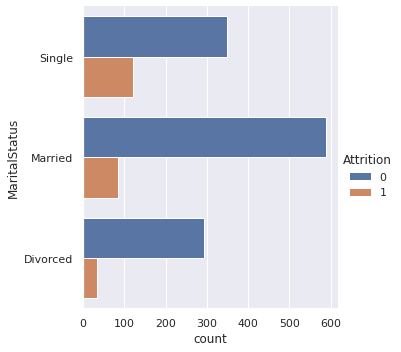

In [ ]:
#MaritalStatus
print(ibmdata[['Attrition','MaritalStatus']].groupby(['Attrition','MaritalStatus']).size())
sb.catplot(data=ibmdata, kind="count", y="MaritalStatus", hue="Attrition")

In [ ]:
#Levels within JobRole
ibmdata["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Attrition  JobRole                  
0          Healthcare Representative    122
           Human Resources               40
           Laboratory Technician        197
           Manager                       97
           Manufacturing Director       135
           Research Director             78
           Research Scientist           245
           Sales Executive              269
           Sales Representative          50
1          Healthcare Representative      9
           Human Resources               12
           Laboratory Technician         62
           Manager                        5
           Manufacturing Director        10
           Research Director              2
           Research Scientist            47
           Sales Executive               57
           Sales Representative          33
dtype: int64


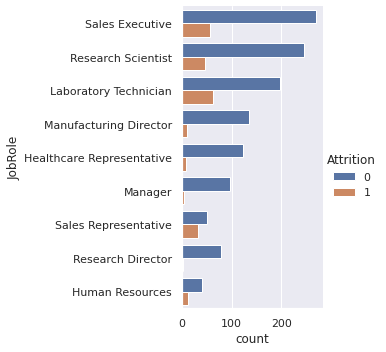

In [ ]:
#JobRole
print(ibmdata[['Attrition','JobRole']].groupby(['Attrition','JobRole']).size())
sb.catplot(data=ibmdata, kind="count", y="JobRole", hue="Attrition")

OverTime  Attrition
No        0            944
          1            110
Yes       0            289
          1            127
dtype: int64


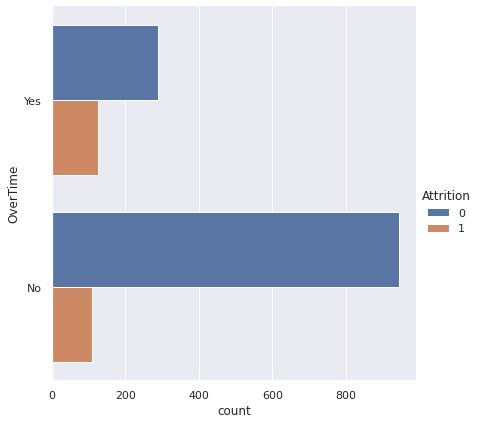

In [ ]:
# Categories of OverTime
print(ibmdata[['Attrition','OverTime']].groupby(['OverTime','Attrition']).size())
sb.catplot(data=ibmdata, kind="count", y="OverTime", hue="Attrition", height=6)

Department              Attrition
Human Resources         0             51
                        1             12
Research & Development  0            828
                        1            133
Sales                   0            354
                        1             92
dtype: int64


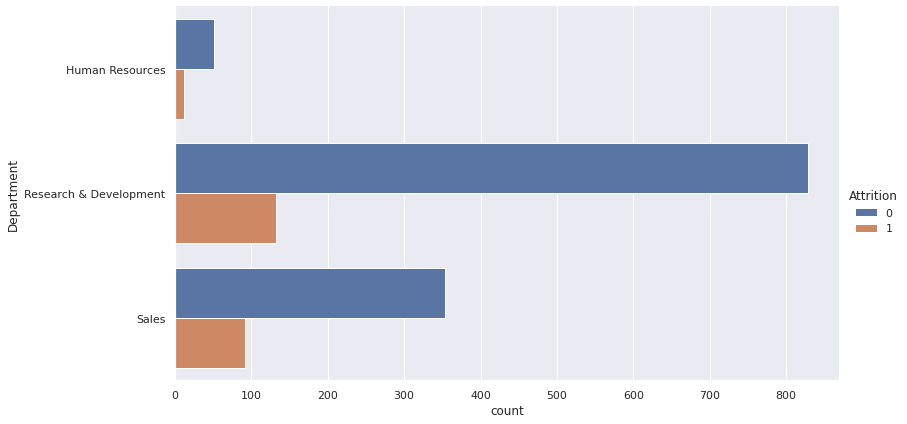

In [ ]:
# Categories of department
print(ibmdata[['Attrition','Department']].groupby(['Department','Attrition']).size())

# plot and groupby attrition
department_order = ['Human Resources','Research & Development', 'Sales']
sb.catplot(y = 'Department', data = ibmdata, kind = 'count', hue = 'Attrition', order = department_order, height = 6, aspect = 2)

In [ ]:
# Basic categories of education field
ibmdata["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Attrition  EducationField  
0          Human Resources      20
           Life Sciences       517
           Marketing           124
           Medical             401
           Other                71
           Technical Degree    100
1          Human Resources       7
           Life Sciences        89
           Marketing            35
           Medical              63
           Other                11
           Technical Degree     32
dtype: int64


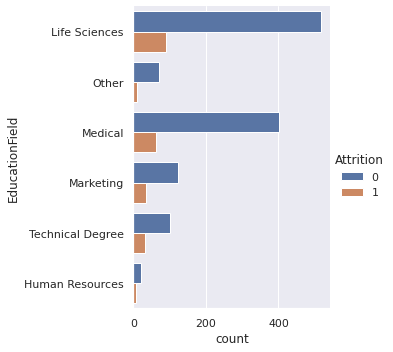

In [ ]:
# plotting the categories of education field 
print(ibmdata[['Attrition','EducationField']].groupby(['Attrition','EducationField']).size())
sb.catplot(data=ibmdata, kind="count", y="EducationField", hue="Attrition")

In [ ]:
# Basic categories of gender
ibmdata["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

Attrition  Gender
0          Female    501
           Male      732
1          Female     87
           Male      150
dtype: int64


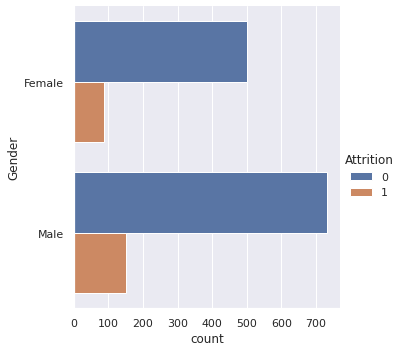

In [ ]:
# plotting gender
print(ibmdata[['Attrition','Gender']].groupby(['Attrition','Gender']).size())
sb.catplot(data=ibmdata, kind="count", y="Gender", hue="Attrition")

### STEP 3: Exploratory Data Analysis

In this step, we will summarize the characteristics of our variables and understand them in an in-depth method before engaging in machine learning.

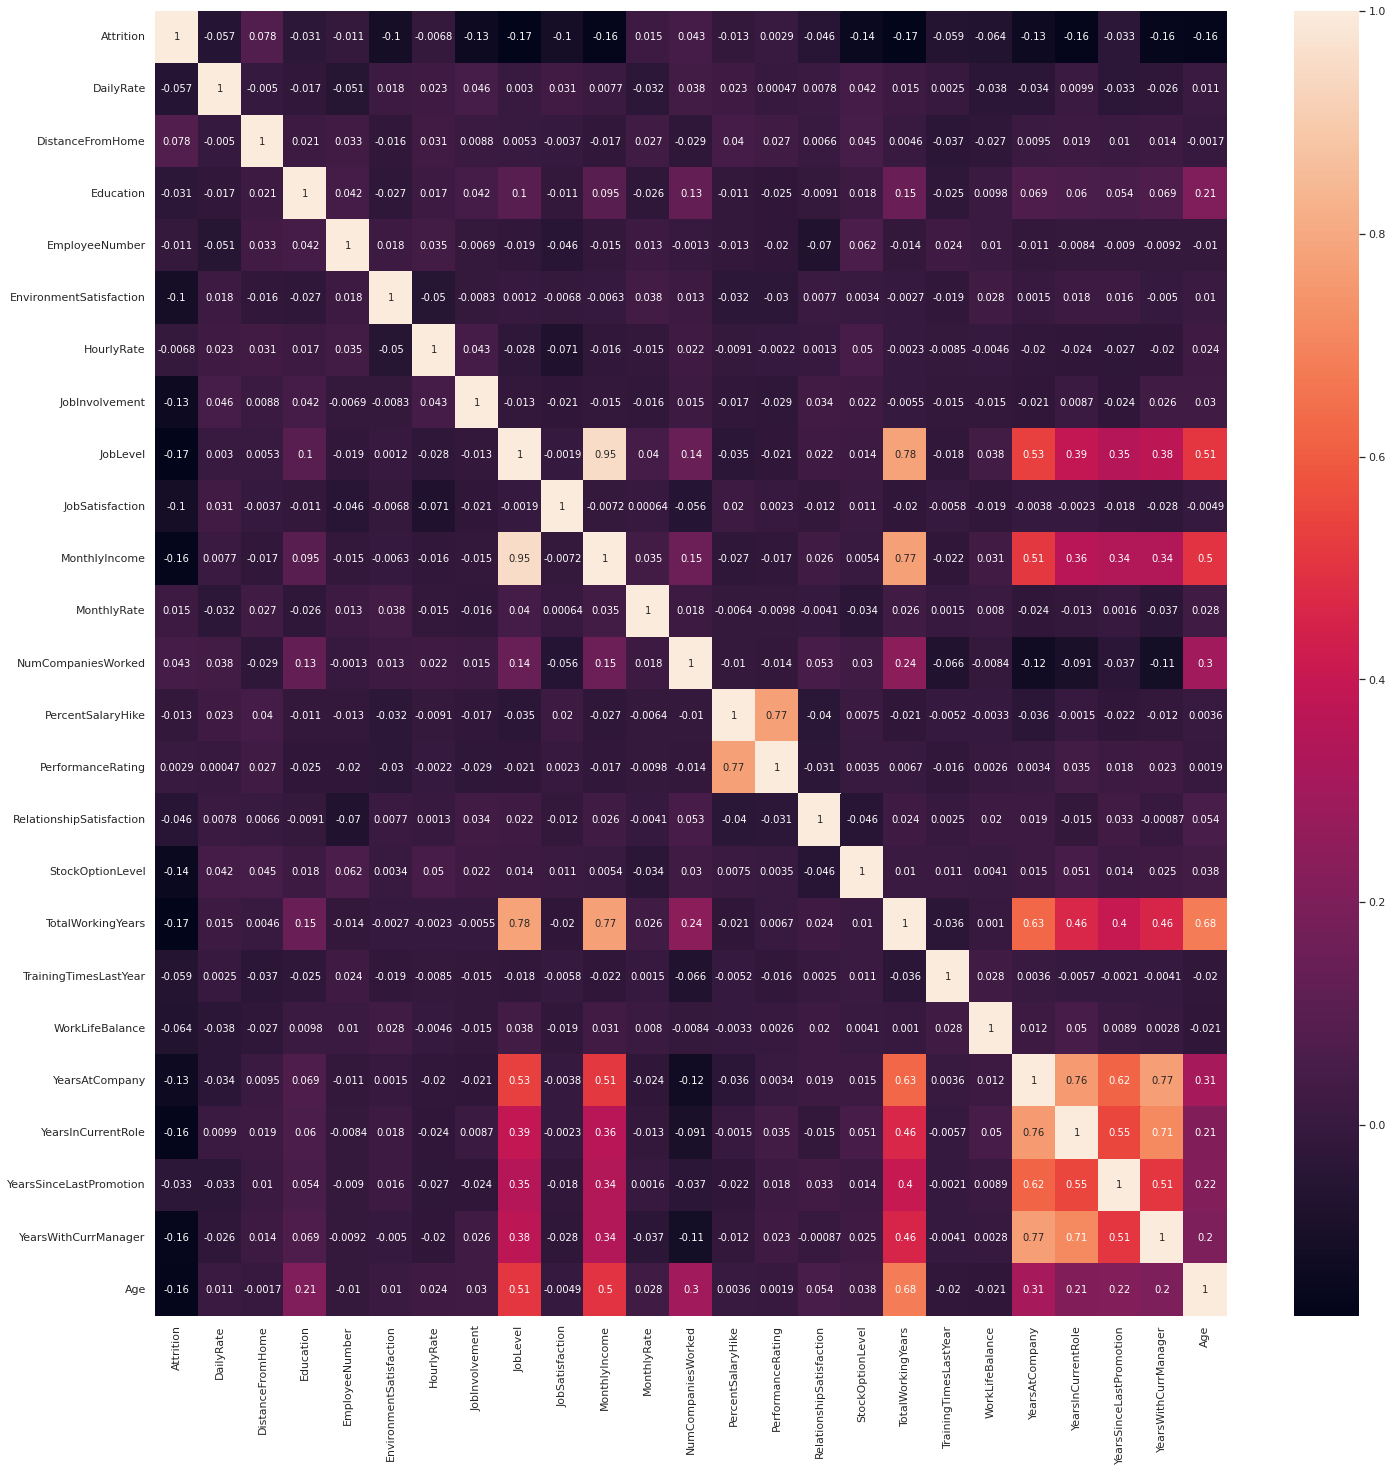

In [ ]:
#Correlation matrix of all numeric variables against attrition
plt.figure(figsize=(24,24))
sb.heatmap(ibmNumeric.corr(), annot=True)
plt.show()

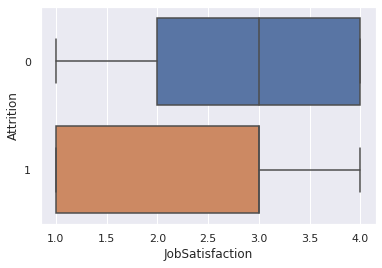

In [ ]:
# analyze the relation between job satisfacation (numeric) and attrition (categorical)
sb.boxplot(x="JobSatisfaction", y="Attrition", data=ibmdata, orient="h")

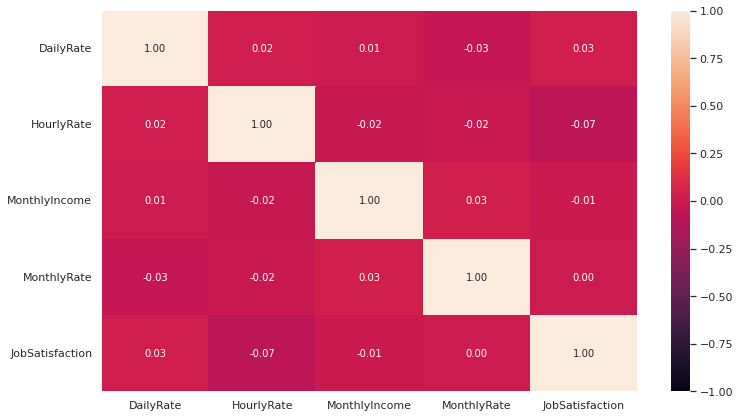

In [ ]:
# correlation of income variables against job satisfaction
js = pd.DataFrame(ibmNumeric['JobSatisfaction'])

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 7))

#for var in ibmNumeric_large, find the correlation with job satisfaction
joint_largeNum = pd.concat([ibmNumeric_large,js],axis = 1)
corrMat_largeNum = joint_largeNum.corr()
sb.heatmap(corrMat_largeNum, vmin = -1, vmax = 1, annot = True, fmt = ".2f")


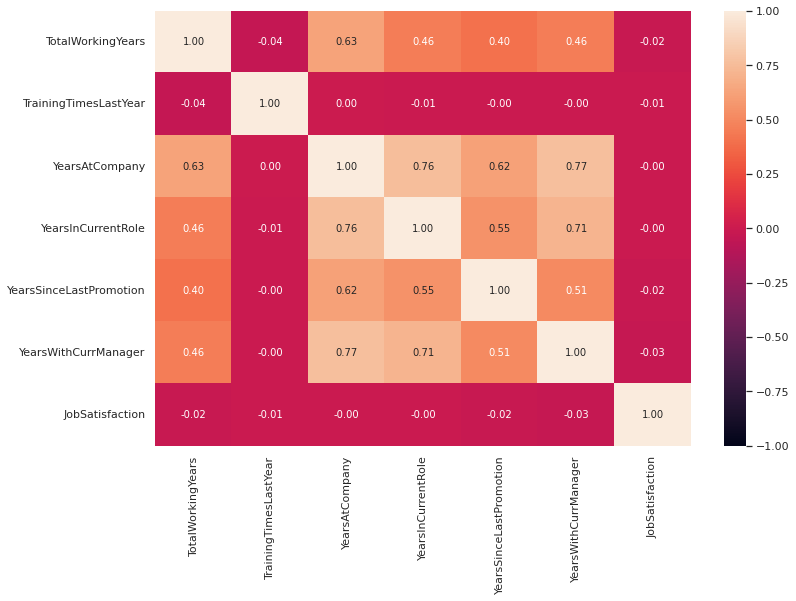

In [ ]:
# correlation of job satisfaction against time-related numeric data
js_jointdf = pd.concat([ibmNumeric_time,ibmdata['JobSatisfaction']],axis=1)

f = plt.figure(figsize=(12, 8))
sb.heatmap(js_jointdf.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

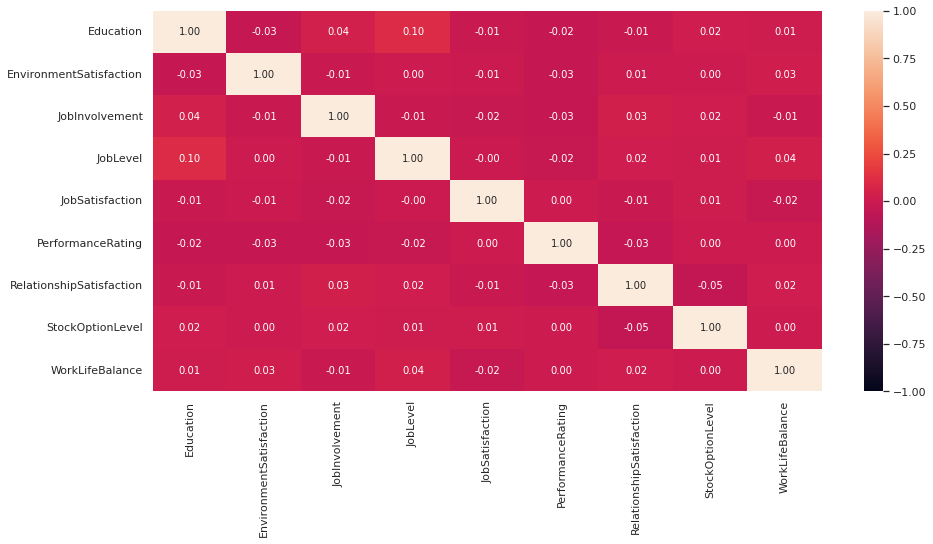

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(15, 7))

# find correlation of level numeric variables with job satisfaction
corrMat_Level = ibmLevel.corr()
sb.heatmap(corrMat_Level, vmin = -1, vmax = 1, annot = True, fmt = ".2f")

We tried to analyze the numeric variables against JobSatisfaction instead of Attrition to check if there were any significant relationships. However, we found that all the correlations were rather weak, and would not be useful for us to proceed further.

Bi-variate relationship shown in scatter plot

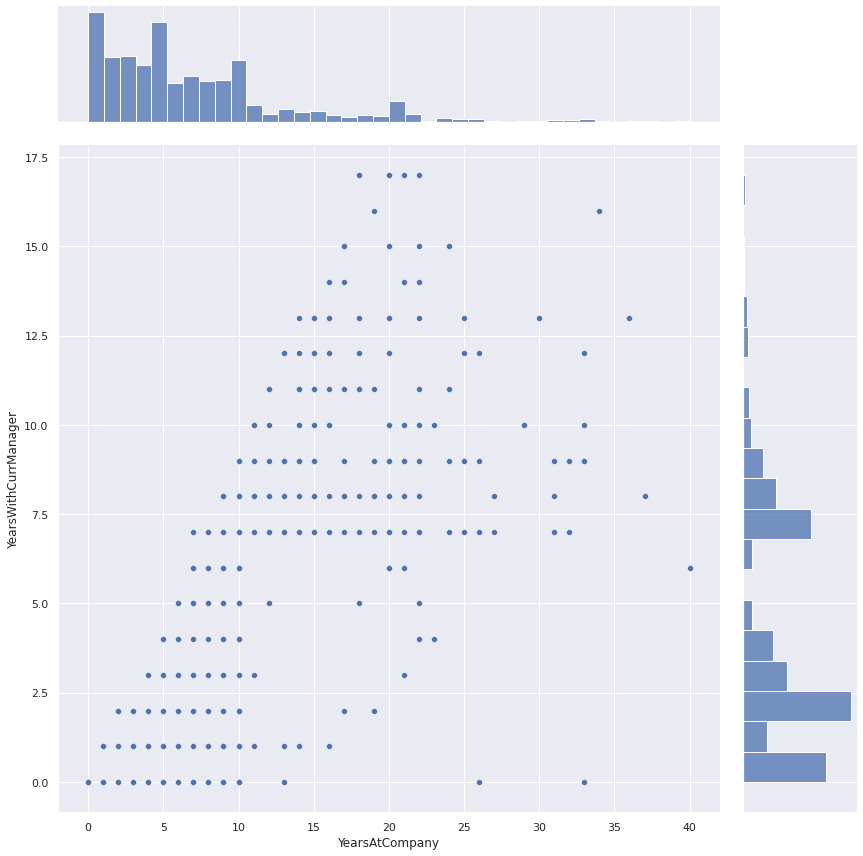

In [ ]:
# corr of YearsAtCompany vs YearsWithCurrManager = 0.77
yearsCompany = pd.DataFrame(ibmdata['YearsAtCompany'])
yearsCurrManager = pd.DataFrame(ibmdata['YearsWithCurrManager'])

# Create a joint dataframe by concatenating the two variables
years_Com_Manager = pd.concat([yearsCompany, yearsCurrManager], axis = 1).reindex(yearsCompany.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = years_Com_Manager, x = "YearsAtCompany", y = "YearsWithCurrManager", height = 12)

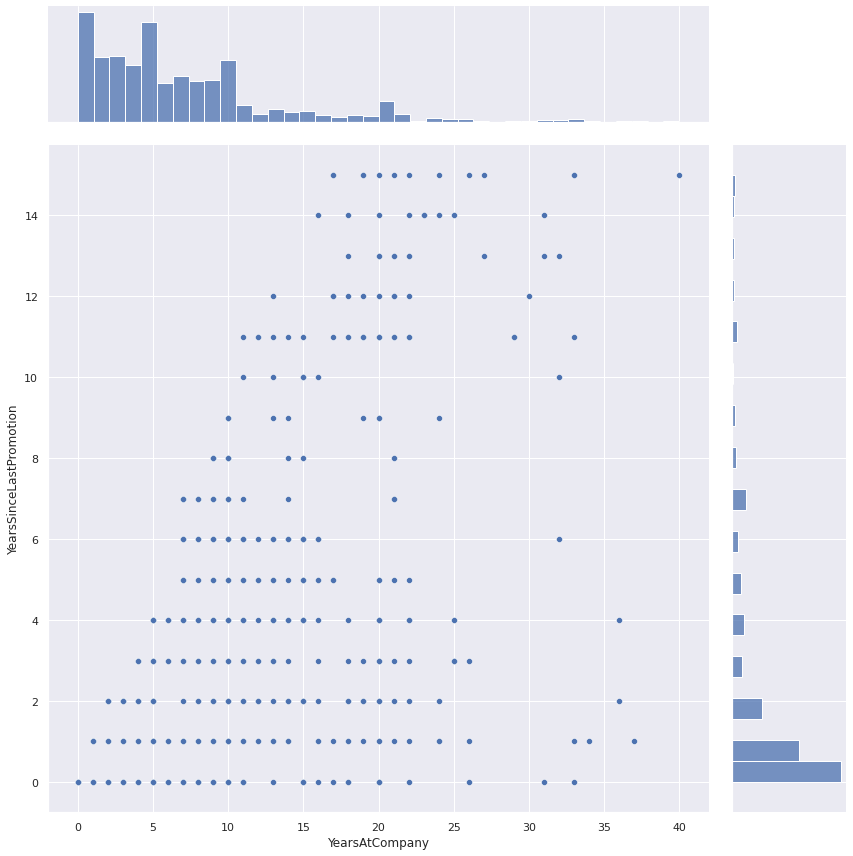

In [ ]:
# corr of YearsAtCompany vs YearsSinceLastPromotion = 0.62
yearsLastPromo = pd.DataFrame(ibmdata['YearsSinceLastPromotion'])

# Create a joint dataframe by concatenating the two variables
years_Com_lastPromo = pd.concat([yearsCompany, yearsLastPromo], axis = 1).reindex(yearsCompany.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = years_Com_lastPromo, x = "YearsAtCompany", y = "YearsSinceLastPromotion", height = 12)

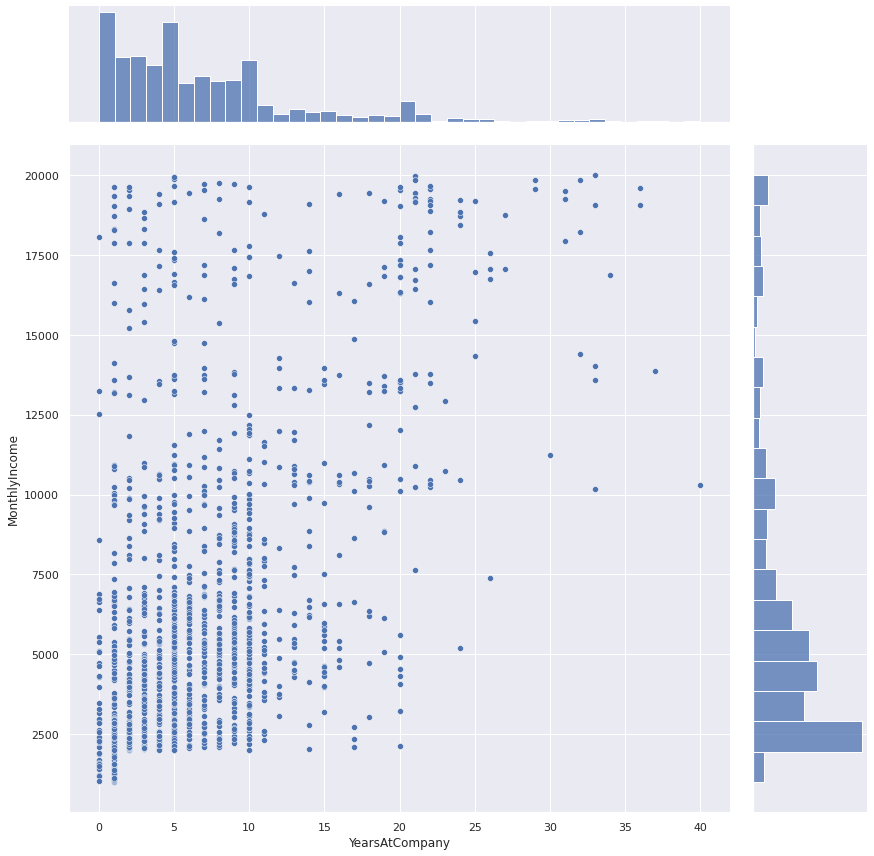

In [ ]:
# corr of YearsAtCompany vs MonthlyIncome = 0.51
monthlyIncome = pd.DataFrame(ibmdata['MonthlyIncome'])

# Create a joint dataframe by concatenating the two variables
years_Com_monthlyIncome = pd.concat([yearsCompany,monthlyIncome], axis = 1).reindex(yearsCompany.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = years_Com_monthlyIncome, x = "YearsAtCompany", y = "MonthlyIncome", height = 12)

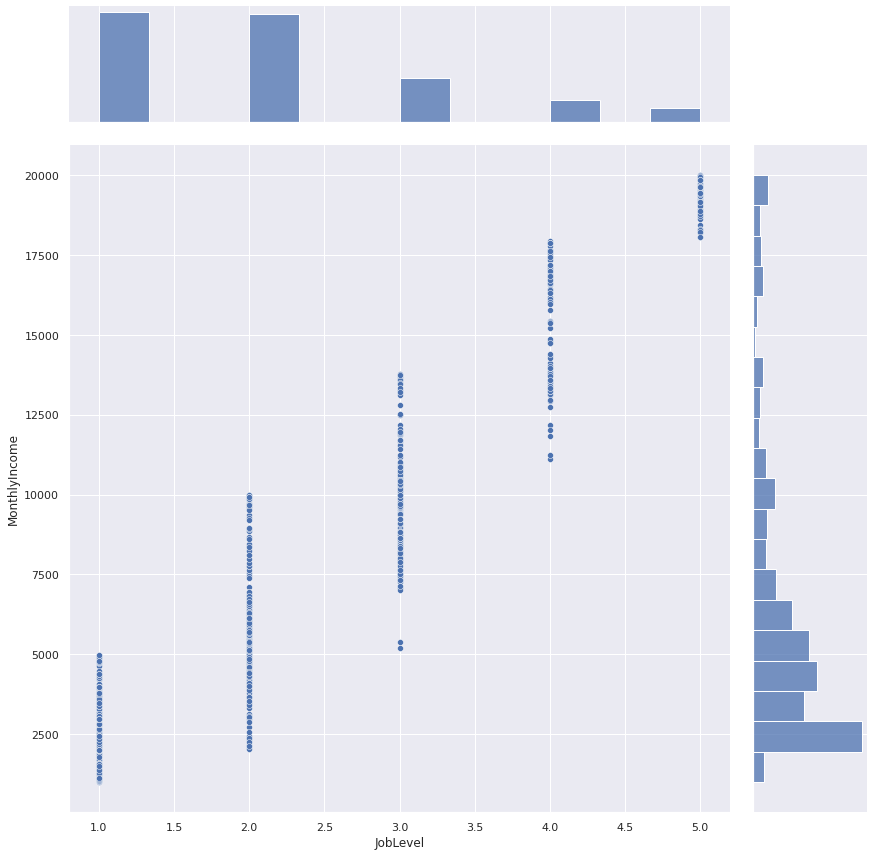

In [ ]:
# JobLevel against MonthlyIncome (corr = 0.95)
JobLevel_MonthlyIncome_joint = pd.concat([ibmdata['JobLevel'],ibmdata['MonthlyIncome']],axis=1)
sb.jointplot(data = JobLevel_MonthlyIncome_joint, x = "JobLevel", y = "MonthlyIncome", height = 12)

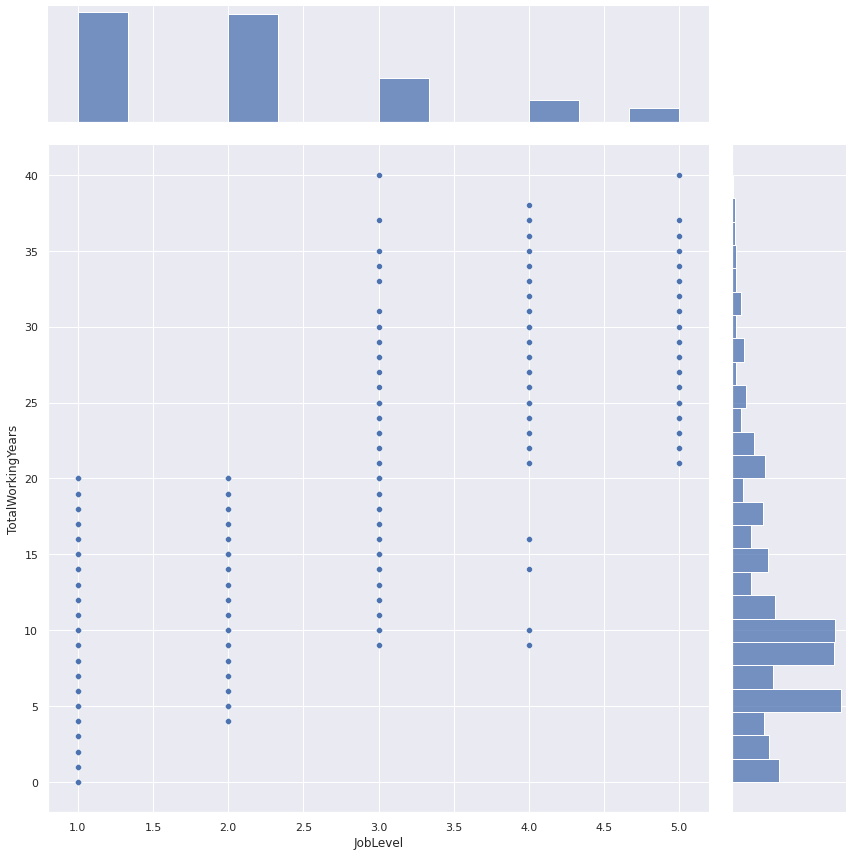

In [ ]:
# JobLevel against TotalWorkingYears (corr = 0.78)
JobLevel_TotalWorkingYears_joint = pd.concat([ibmdata['JobLevel'],ibmdata['TotalWorkingYears']],axis=1)
sb.jointplot(data = JobLevel_TotalWorkingYears_joint, x = "JobLevel", y = "TotalWorkingYears", height = 12)

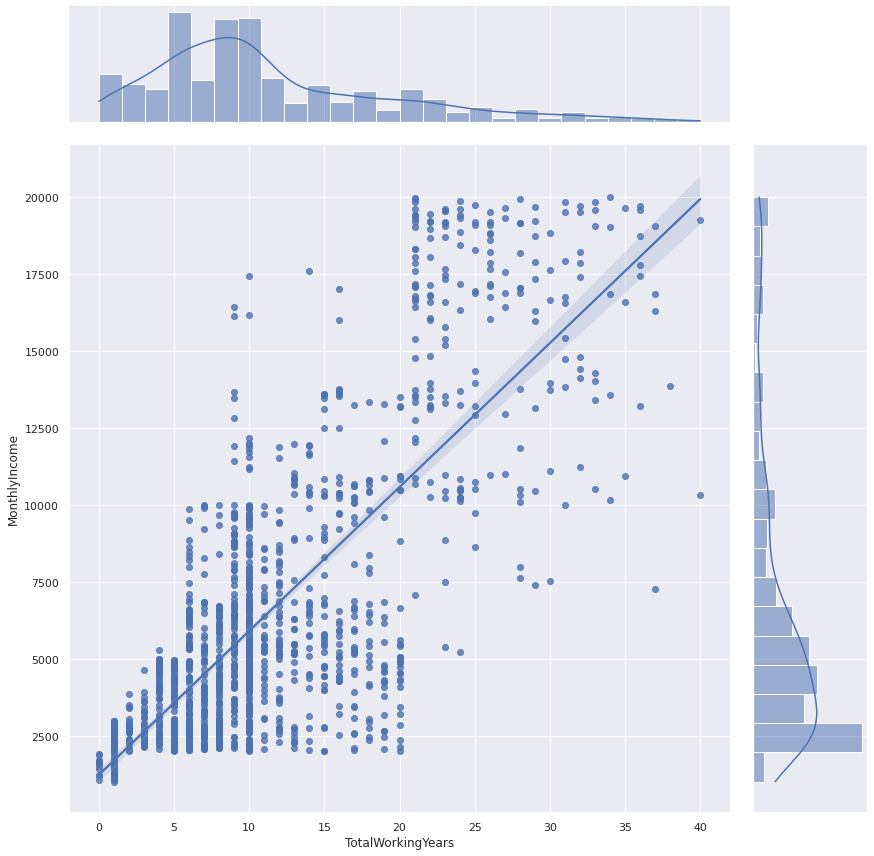

In [ ]:
# TotalWorkingYears against MonthlyIncome (corr = 0.77)
TotalWorkingYears_MonthlyIncome_joint = pd.concat([ibmdata['TotalWorkingYears'],ibmdata['MonthlyIncome']],axis=1)
sb.jointplot(data = TotalWorkingYears_MonthlyIncome_joint, x = "TotalWorkingYears", y = "MonthlyIncome", kind='reg', height = 12)

### STEP 4: Machine Learning
In this step, we will use several predictive models to discover possible patterns in the dataset and make predictions based on them. From there, we would be a step closer in answering our main objectives.

*Random* Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

response = pd.read_csv("IBMAttrition.csv",usecols = ['Attrition'])
predics = pd.DataFrame(ibmdata[["MonthlyIncome", "Age", "YearsInCurrentRole", "TotalWorkingYears", "JobLevel","JobSatisfaction","EnvironmentSatisfaction","JobInvolvement","StockOptionLevel","YearsWithCurrManager","YearsAtCompany"]])


train_predics,test_predics,train_response,test_response = train_test_split(predics,response,test_size = 0.25, random_state = 42)

# import random forest and fit the data 
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf.fit(train_predics,train_response)

# use the current model and the test set of predictors to predict the response 
response_pred = rf.predict(test_predics)
print("Accuracy: ",metrics.accuracy_score(test_response,response_pred))

Accuracy:  0.845108695652174


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# do Hyperparameter tuning using randomized search

params = {'max_depth': [2,3,5,10,15,20],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV over random forest model for the defined parameters
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

# Random search selects random combinations of hyperparameters to train the model
# shorter time to compute but may not find as accurate of a result as grid search
random_search.fit(train_predics,train_response)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [10, 25, 30]},
                   scoring='accuracy', verbose=1)

In [ ]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)


In [ ]:
# print the best score of model that uses randomized search
print(random_search.best_score_)

0.8466403162055336


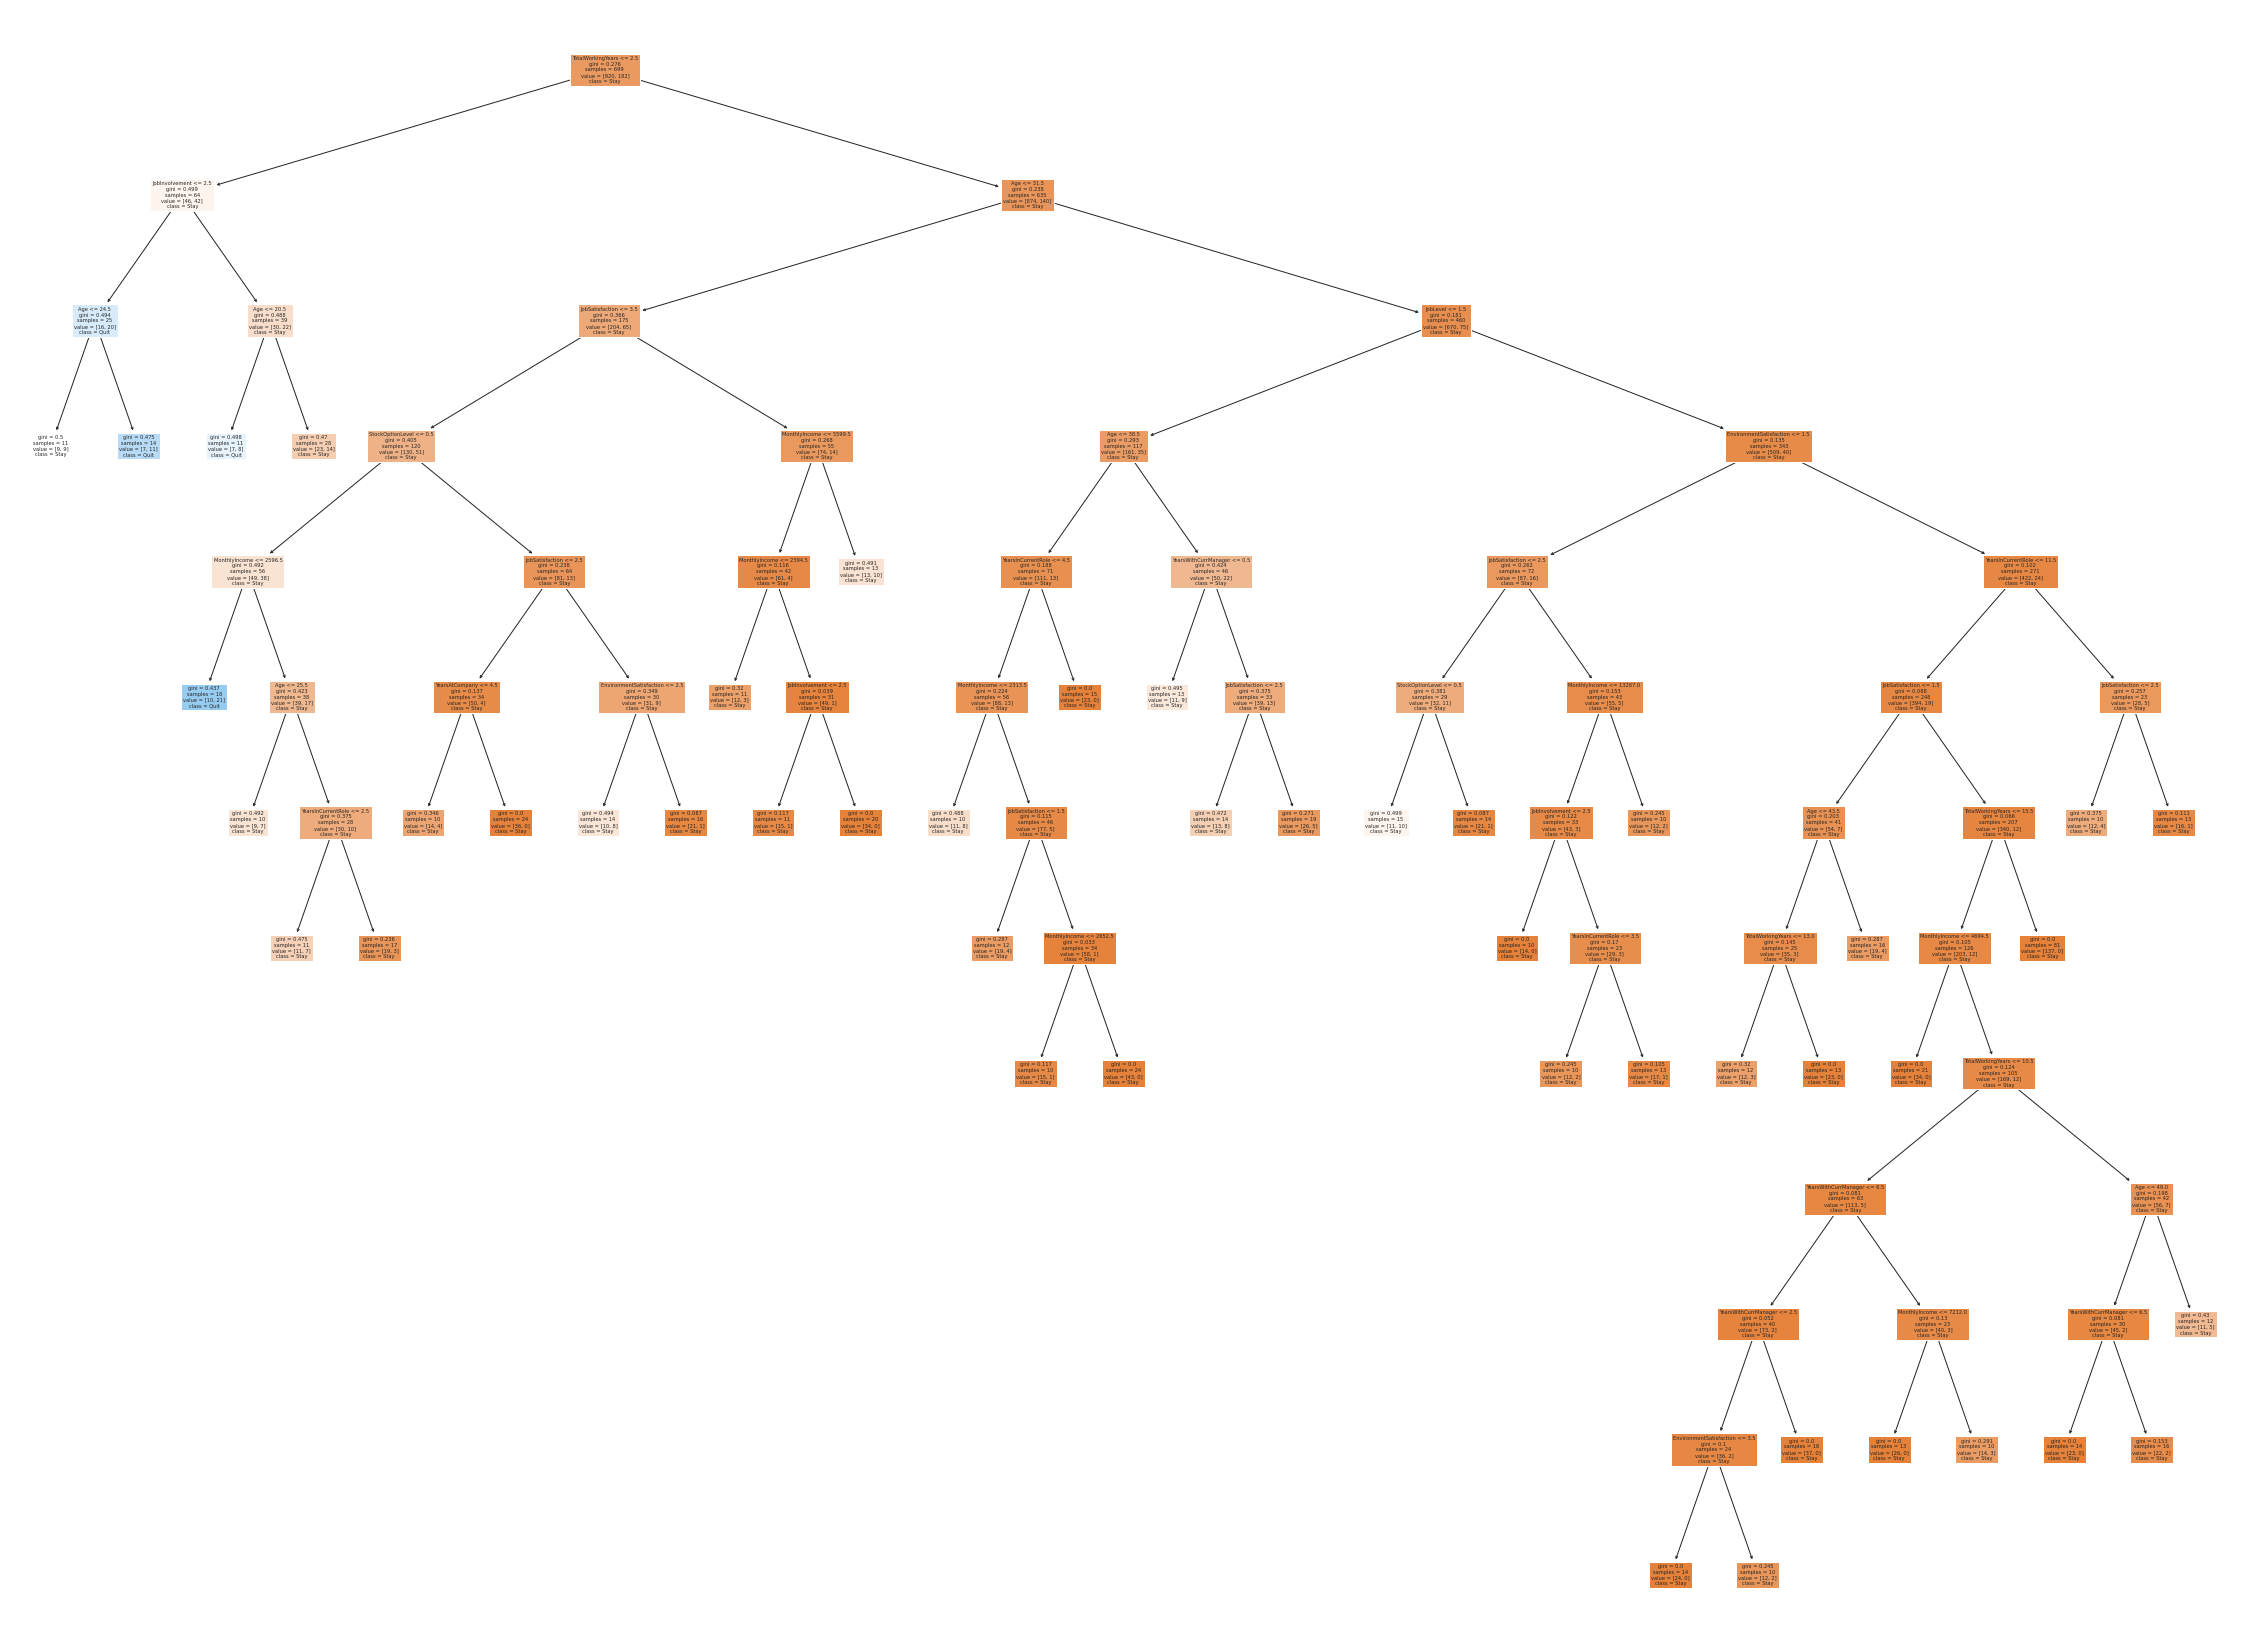

In [ ]:
# plot one of the trees from random forest 
from sklearn.tree import plot_tree

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# tree created by estimators_[2], each tree is independent of each other
plot_tree(randomized_best.estimators_[2],feature_names = predics.columns,class_names=['Stay','Quit'],filled=True);

Classification

Logistic Regression Model: predict probability of categorical dependent variable (Attrition) using categorical variables (OverTime,Gender,MaritalStatus,Department, E) in the dataset

In [ ]:
cate_pred = pd.DataFrame(ibmdata[["OverTime","Gender","MaritalStatus","Department","EducationField"]])
cate_pred

,OverTime,Gender,MaritalStatus,Department,EducationField
0,Yes,Female,Single,Sales,Life Sciences
1,No,Male,Married,Research & Development,Life Sciences
2,Yes,Male,Single,Research & Development,Other
3,Yes,Female,Married,Research & Development,Life Sciences
4,No,Male,Married,Research & Development,Medical
...,...,...,...,...,...
1465,No,Male,Married,Research & Development,Medical
1466,No,Male,Married,Research & Development,Medical
1467,Yes,Male,Married,Research & Development,Life Sciences
1468,No,Male,Married,Sales,Medical


In [ ]:
# convert categorical data into indicator variables 
cate_pred = pd.get_dummies(cate_pred,columns=['OverTime','Gender'],drop_first=True)
cate_pred = pd.get_dummies(cate_pred,prefix = ['MaritalStatus','Department','EducationField'] ,columns = ['MaritalStatus','Department','EducationField'])
cate_pred

,OverTime_Yes,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1466,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1467,1,1,0,1,0,0,1,0,0,1,0,0,0,0
1468,0,1,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter("ignore")
lr = LogisticRegression()

resp = pd.read_csv("IBMAttrition.csv",usecols = ['Attrition'])

# random split the dataset into test and train
train_pred, test_pred, train_resp, test_resp = train_test_split(cate_pred,resp,test_size = 0.25, random_state = 42)

# fit the logistic regression model with train dataset
lr.fit(train_pred,train_resp)

train_accuracy = lr.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_accuracy))

resp_pred = lr.predict(test_pred)
test_accuracy = accuracy_score(test_resp,resp_pred)
print('Accuracy on the test set: {:.2f}'.format(test_accuracy))

Accuracy on the train set: 0.84
Accuracy on the test set: 0.86


In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(lr, n_features_to_select = 1)
selector = selector.fit(train_pred,train_resp.Attrition.ravel())

x=1
for i in train_pred.columns:
    print(x,":",i)
    x+=1

1 : OverTime_Yes
2 : Gender_Male
3 : MaritalStatus_Divorced
4 : MaritalStatus_Married
5 : MaritalStatus_Single
6 : Department_Human Resources
7 : Department_Research & Development
8 : Department_Sales
9 : EducationField_Human Resources
10 : EducationField_Life Sciences
11 : EducationField_Marketing
12 : EducationField_Medical
13 : EducationField_Other
14 : EducationField_Technical Degree


In [ ]:
# calculate performance metrics to show accuracy, precision and recall
# precision: percent of correct prediction: TP/(TP+FP)
# recall: percert of positive cases caught: TP/(TP+FN)
# F1 score: percent of positive prediction that were correct: use to compare classifier models, not global accuracy

print(classification_report(test_resp,resp_pred))

              precision    recall  f1-score   support

          No       0.88      0.97      0.92       320
         Yes       0.38      0.10      0.16        48

    accuracy                           0.86       368
   macro avg       0.63      0.54      0.54       368
weighted avg       0.81      0.86      0.83       368



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

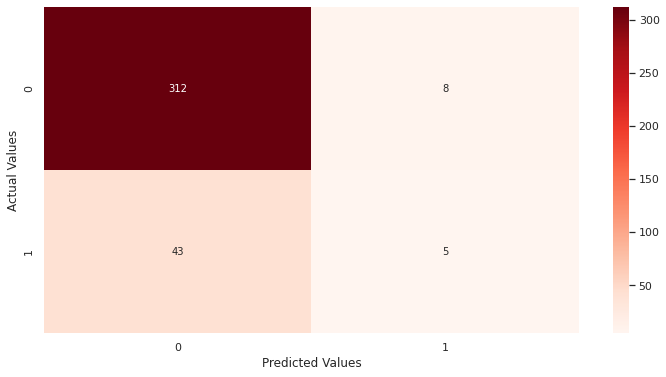

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_resp,resp_pred)
plt.figure(figsize=(12,6))
sb.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt

Anomaly Detection

In [ ]:
X = pd.DataFrame(ibmdata[['JobLevel','MonthlyIncome','Attrition']])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X[['JobLevel','MonthlyIncome']])

LocalOutlierFactor(contamination=0.05)

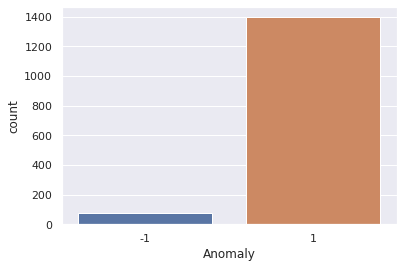

In [ ]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

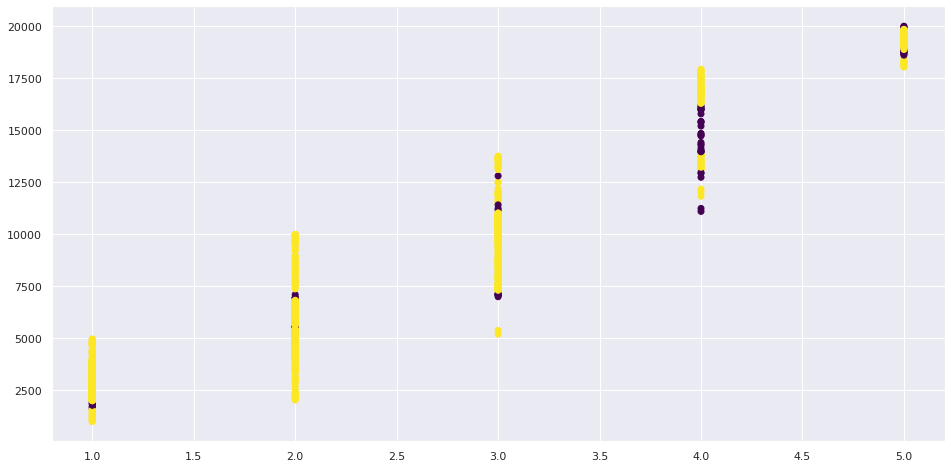

In [ ]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "JobLevel", y = "MonthlyIncome", c = "Anomaly", cmap = 'viridis', data = X_labeled)

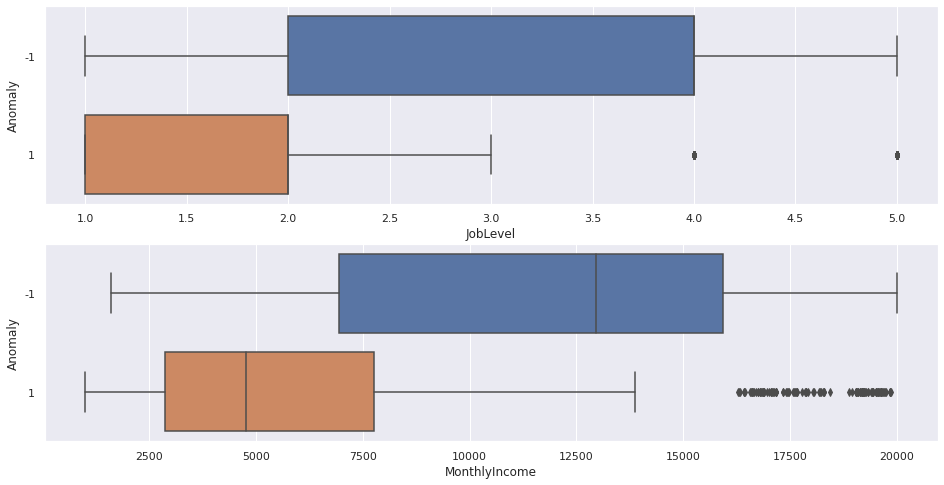

In [ ]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'JobLevel', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'MonthlyIncome', y = 'Anomaly', data = X_labeled, ax = axes[1])

In [ ]:
print(X_labeled.groupby(['Anomaly','Attrition']).size())
X_anomaly = X_labeled[X_labeled['Anomaly']==-1]
print(X_anomaly[X_anomaly['Attrition'] == 1].shape)
print(X_anomaly[X_anomaly['Attrition'] == 0].shape)

Anomaly  Attrition
-1       0              67
         1               7
1        0            1166
         1             230
dtype: int64
(7, 4)
(67, 4)


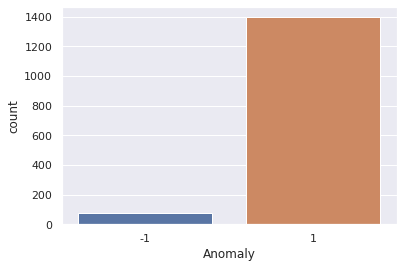

In [ ]:
X2 = pd.DataFrame(ibmdata[['TotalWorkingYears','MonthlyIncome','Attrition']])
# Create Anomaly Detection Model using LocalOutlierFactor
lof2 = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)
# Fit the Model on the Data and Predict Anomalies
lof2.fit(X2[['TotalWorkingYears','MonthlyIncome']])
# Predict the Anomalies
labels = lof2.fit_predict(X2)

# Append Labels to the Data
X2_labeled = X2.copy()
X2_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X2_labeled["Anomaly"])

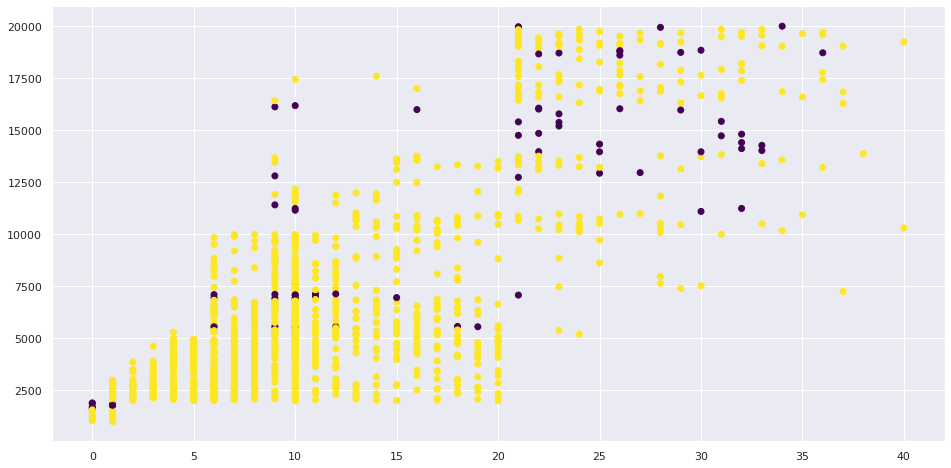

In [ ]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "TotalWorkingYears", y = "MonthlyIncome", c = "Anomaly", cmap = 'viridis', data = X2_labeled)

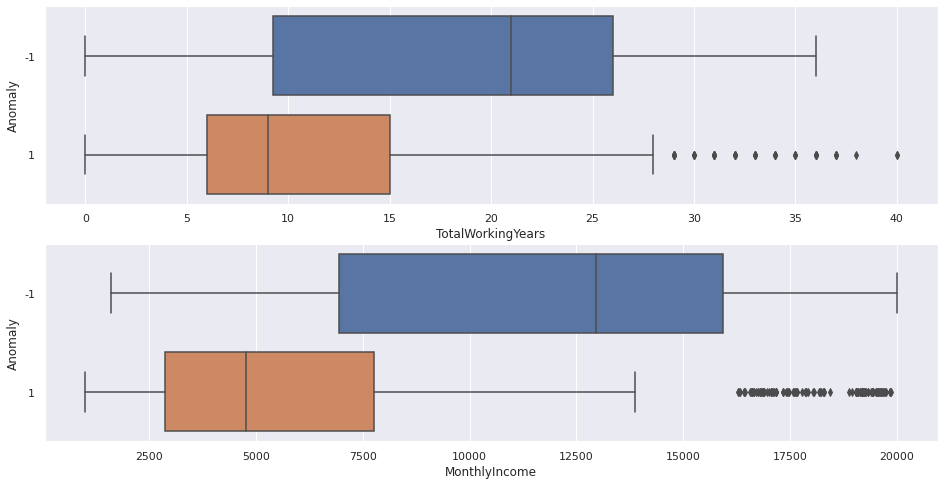

In [ ]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'TotalWorkingYears', y = 'Anomaly', data = X2_labeled, ax = axes[0])
sb.boxplot(x = 'MonthlyIncome', y = 'Anomaly', data = X2_labeled, ax = axes[1])

In [ ]:
X2_labeled.head()

,TotalWorkingYears,MonthlyIncome,Attrition,Anomaly
0,8,5993,1,1
1,10,5130,0,1
2,7,2090,1,1
3,8,2909,0,1
4,6,3468,0,1


In [ ]:
#
print(X2_labeled.groupby(['Anomaly','Attrition']).size())
X2_anomaly = X2_labeled[X2_labeled['Anomaly']==-1]
print(X2_anomaly[X2_anomaly['Attrition'] == 1].size)
print(X2_anomaly[X2_anomaly['Attrition'] == 0].size)

Anomaly  Attrition
-1       0              67
         1               7
1        0            1166
         1             230
dtype: int64
28
268


In [ ]:
(lof.negative_outlier_factor_ < -2)

array([False, False, False, ..., False, False, False])

In [ ]:
lof2.negative_outlier_factor_

array([-1.03957363, -1.023123  , -0.98775568, ..., -0.98012087,
       -1.01527015, -1.00541963])

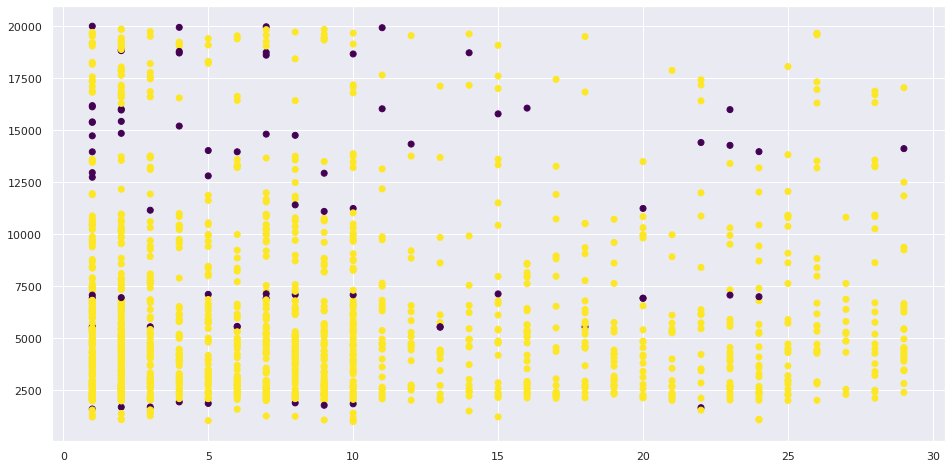

In [ ]:
#analyze DistanceFromHome against Monthly Income
X3 = pd.DataFrame(ibmdata[['DistanceFromHome','MonthlyIncome','Attrition']])
# Create Anomaly Detection Model using LocalOutlierFactor
lof3 = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)
# Fit the Model on the Data and Predict Anomalies
lof3.fit(X3[['DistanceFromHome','MonthlyIncome']])
# Predict the Anomalies
labels = lof3.fit_predict(X3)

# Append Labels to the Data
X3_labeled = X3.copy()
X3_labeled["Anomaly"] = pd.Categorical(labels)

# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "DistanceFromHome", y = "MonthlyIncome", c = "Anomaly", cmap = 'viridis', data = X3_labeled)

In [ ]:
X3_anomaly = X3_labeled[X3_labeled['Anomaly']==-1]
print(X3_anomaly[X3_anomaly['Attrition'] == 1].size)
print(X3_anomaly[X3_anomaly['Attrition'] == 0].size)

28
268


Simple Neural Network

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

In [ ]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes): #input_size: num of attributes, num_classes: classification
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [ ]:
model = Net(3, 100, 50, 2)
print(model)

Net(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [ ]:
# create the dataloader
batch_size = 300
ibm_neural = ibmdata[['MonthlyIncome','DistanceFromHome','YearsInCurrentRole','Attrition']]
train, test = train_test_split(ibm_neural, test_size = 0.2)

# How many instances have we got?
print('# instances in training set: ', len(train))
print('# instances in testing/validation set: ', len(test))

# Create the dataloaders - for training and validation/testing
train_label = torch.tensor(train['Attrition'].values)
train_data = torch.tensor(train[['MonthlyIncome','DistanceFromHome','YearsInCurrentRole']].values)
test_label = torch.tensor(test['Attrition'].values)
test_data = torch.tensor(test[['MonthlyIncome','DistanceFromHome','YearsInCurrentRole']].values)

train_label = train_label.type(torch.LongTensor)
train_data = train_data.type(torch.LongTensor)
test_label = test_label.type(torch.LongTensor)
test_data = test_data.type(torch.LongTensor)

# instances in training set:  1176
# instances in testing/validation set:  294


In [ ]:
print(train_label[0].dtype)

torch.int64


In [ ]:
# Our model
net = Net(3, 100, 50, 2)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0) 

In [ ]:
num_epochs = 10

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i in range(len(train)):
        # Every data instance is an input + label pair
        inputs, labels = train_data[i], train_label[i]

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = criterion(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    #return last_loss

RuntimeError: ignored

In [ ]:
num_epochs = 10

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i in range(len(train)):
        # Every data instance is an input + label pair
        inputs, labels = train_data[i], train_label[i]

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = criterion(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

In [ ]:
num_epochs = 10

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i in range(len(train)):
        
        # Convert torch tensor to Variable
        items = train_data[i]
        classes = train_label[i]
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test.data.values[:, 0:4])
    test_classes = torch.LongTensor(test.data.values[:, 4])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data[0])
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))